# Proyecto: Estimación de la apreciación de una acción durante su primer año de cotización en bolsa

### Modificaciones del Desafío #6:
##### a. Reestructuracion del Objetivo Principal, Contexto Comercial y Problema Comercial en una sola sección (Abstracto con motivación y audiencia)
##### b. Agregar secciones Conformación del equipo de trabajo e Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)
##### c. Adición de secciones Primer Data Wrangling y Exploratory Data Analysis (EDA): Univariado y Bivariado, con información previa.
##### d. Eliminación de la hipótesis 5.7 (anterior numeración) dado que dicha variable no interesa como predictora.
##### e. Realización de las tres hipótesis faltantes (5.9 - 5.11 nueva numeración).
##### f. Implementacion de variables 'dummy' a partir de variables discretas (Sector, Industry y stateCountry).

# 1) Abstracto con motivación y audiencia

Conforme pasan los años, conseguir retornos en inversiones en acciones que superen los rendimientos de sus competidores directos se hace más difícil. La teoría financiera indica que, acciones públicas que tengan una volatilidad parecida, variarán su precio de manera similar. Conseguir un retorno adicional entre productos financieros comparables es lo que se conoce como 'alpha'. En el contexto actual, conseguir este excedente es complejo debido a que compiten por él ejércitos de analistas que potencian sus habilidades mediante el uso de cada vez más rápidos e inteligentes algoritmos predictivos.

El interés predictivo y, por consiguiente, la mayor racionalidad de mercado, se concentra alrededor de los principales índices y compañías. Es alrededor de índices como el S&P por ejemplo, que conseguir un alpha superior al 0.5% es prácticamente imposible. Sin embargo, esto deja abierta la puerta de mercados menos conocidos donde haya menos competencia por parte de grandes entidades comercializadoras de acciones y por ende, precios menos racionales. Uno de ellos, y el que investigaremos en este documento, es el mercado de las empresas que recién salieron a cotizar tras una IPO.

El objetivo principal estará en determinar qué características de una empresa apenas finalizada su IPO son más importantes para predecir su desempeño en el mercado de valores. Esta investigación contempla más de 2000 empresas que salieron a cotizar entre 1996 y 2018, y cuyos rendimientos se analizan sobre su primer año de cotización.

El impacto de esta investigación está dirigido a personas con acceso a vehículos de inversión complejos, pero que no cuentan con el capital suficiente o los contactos para acceder a IPO's y fondos sofisticados de manejo de capitales. En otras palabras, personas que han generado una buena bolsa de ahorros, pero no la suficiente para ser considerados influyentes en el mercado.

# 2) Preguntas e hipótesis de la investigación

#### Market Trend vs Fluctuacion del Precio
5.1. ¿Qué sectores lo hacen mejor en los años alcistas?

5.2. ¿Qué sectores lo hacen mejor en los años bajistas?

5.3. ¿Cuál es la proporción de empresas que salen a cotizar en años bajistas vs alcistas?

5.4. Las empresas de los diferentes sectores se distribuirán de forma normal en cuanto a crecimiento de la valorización se refiere.


#### Ubicacion Geografica
5.5 ¿Las empresas de cuáles países se desempeñan mejor por sector? Incluir un estudio de EEUU vs Resto del mundo

#### Empleados
5.6 ¿La cantidad de empleados se relaciona con el Market Cap? Diferenciar por sector

#### Longevidad de la Empresa
5.7 Una empresa antigua tenderá a hacerlo mejor en su primer año de cotización en mercados públicos?  Diferenciar por sector

#### Volatilidad
5.8 ¿Cómo se distribuye la capitalización de mercado de las IPO's? 

5.9 ¿La capitalización de mercado está inversamente relacionada con la variación de la cotización anual y la volatilidad diaria? Diferenciar por sector

5.10 ¿Mayor volatilidad tiende a tener mayores retornos? Diferenciar por sector

5.11 ¿Hay relación entre el volumen diario medio como porcentaje del Market Cap de una acción y su volatilidad diaria?

#### Ratios financieros: P/E to growth
5.12 ¿Cuál es la relación entre el P/E del año anterior a cotizar con la cotización en el primer año en bolsa? Diferenciar por sector

# 3) Conformación del equipo de trabajo

Franco Carlini

Tutor: Álvaro Galindo

# 4) Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)

Fuente del dataset:

Datos de compañías: https://www.kaggle.com/code/gauravnpatwardhan/ipo-data-analysis

# 5) Primer Data Wrangling

In [190]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import random

In [191]:
pd.set_option('display.max_columns', None)

In [192]:
df = pd.read_csv("IPODataFull.csv", low_memory=False,encoding='unicode_escape')
df.head()

Symbol  DaysBetterThanSP  daysProfit daysProfitGrouped  exactDiffernce  \
0      A               122         249              200+             NaN   
1    AAC               131         262              200+           232.0   
2   AAOI               125         262              200+          6054.0   
3    AAP               128         261              200+             NaN   
4    AAT               123         127         100 - 149           181.0   

   Year  Month  Day  dayOfWeek  closeDay0  highDay0  openDay0  lowDay0  \
0  1999     11   18          3    28.6358   33.5207   27.3725  30.6572   
1  2014     10    2          3    18.5000   20.1000   17.6000  20.0000   
2  2013      9   26          3     9.9600   10.0900    9.3700  10.0000   
3  2001     11   29          3    13.9000   14.4667   13.3833  13.4000   
4  2011      1   13          3    21.2500   22.0000   21.1800  21.5300   

   volumeDay0  closeDay1  highDay1  openDay1  lowDay1  volumeDay1  closeDay2  \
0  59753154.0    27.2040   28.9727   26.8253  28.9323  16172993.0    29.3517   
1   2799073.0    18.6500   18.7500   18.0500  18.2000    155562.0    19.2400   
2    948999.0    10.1000   10.4400   10.0000  10.4400    253329.0    10.0000   
3    371100.0    14.2834   14.2834   13.9000  13.9000    165300.0    13.7830   
4  15536889.0    21.3100   21.4500   21.1600  21.1600   1304772.0    21.3100   

   highDay2  openDay2  lowDay2  volumeDay2  closeDay3  highDay3  openDay3  \
0   29.3517   26.9935  27.8357   5435127.0    27.1198   28.8885   27.1198   
1   19.5800   18.4800  18.4800    188229.0    19.2400   19.4800   18.9293   
2   10.1800    9.7100  10.0000     84885.0    10.0000   10.0240    9.9200   
3   14.2330   13.7830  14.2300    127500.0    13.2330   13.7830   13.2330   
4   21.4500   21.1600  21.1600         0.0    21.3700   21.4600   21.1200   

   lowDay3  volumeDay3  closeDay4  highDay4  openDay4  lowDay4  volumeDay4  \
0  28.6358   5035889.0    27.6676   28.2571   26.9513  27.0389   5141708.0   
1  19.3600    176606.0    19.1300   19.4800   18.9000  19.1700     37046.0   
2   9.9500     74509.0     9.9700   10.0000    9.8900   9.9900     94046.0   
3  13.7800     95400.0    14.6670   14.7830   13.4330  13.4330    598200.0   
4  21.3000    493070.0    21.2500   21.4200   20.8800  21.4200   1010169.0   

   closeDay5  highDay5  openDay5  lowDay5  volumeDay5  closeDay6  highDay6  \
0    27.6676   28.2571   26.9513  27.0389         0.0    27.7518    27.962   
1    19.2500   19.5500   19.0000  19.1600    114523.0    19.0000    19.360   
2    10.0000   10.0100    9.8000   9.9700     72425.0    10.2000    10.200   
3    14.5730   14.7330   14.5700  14.7300    157200.0    14.6670    14.667   
4    21.2100   21.4000   21.0300  21.0500    736532.0    21.2500    21.300   

   openDay6  lowDay6  volumeDay6  closeDay7  highDay7  openDay7  lowDay7  \
0   27.4567  27.5443   1836047.0    28.3831    28.594   27.3307  27.6251   
1   18.7700  19.2500     34775.0    19.0000    19.100   18.6401  18.9200   
2    9.8201  10.0100    109774.0    10.1800    10.400   10.0600  10.4000   
3   14.4670  14.5800    215100.0    14.6170    14.640   14.5870  14.6300   
4   21.0300  21.3000    636750.0    21.3000    21.390   21.1000  21.2000   

   volumeDay7  closeDay8  highDay8  openDay8  lowDay8  volumeDay8  closeDay9  \
0   4325867.0    28.4256   28.9309   27.5834  28.2989   4575651.0    28.9309   
1     52514.0    18.1000   19.0300   17.9100  19.0300    126457.0    19.4300   
2     52731.0    10.1200   10.1999   10.1000  10.1600     13890.0    10.1500   
3    119100.0    14.5870   14.7100   14.5870  14.6000    378600.0    14.1000   
4    354269.0    21.2700   21.4700   21.1500  21.2000    295652.0    21.2700   

   highDay9  openDay9  lowDay9  volumeDay9  closeDay10  highDay10  openDay10  \
0   29.2678   28.2147  28.4269   3139581.0     29.7307    30.3203    29.0994   
1   19.5000   18.0000  18.1000     46156.0     19.4000    19.8500    19.0000   
2   10.2100   10.1400  10.1400     14788

In [193]:
df.shape

(3762, 1664)

In [194]:
colnames = list(df.columns)
#colnames[1000:len(colnames)]

### Separamos el DF principal en dos partes:
#### - 'main': variables no referentes a precios
#### - 'prices': variables referentes precios

In [195]:
close_day_0 = df.columns.get_loc('closeDay0')
name = df.columns.get_loc('Name')

print(close_day_0)

df_prices = df.iloc[:,close_day_0:name]

colname_symbol = (df.columns[df.columns.get_loc('Symbol')])

df_prices.insert(0, colname_symbol, df['Symbol'])
df_prices['HomeRunDay'] = df['HomeRunDay']
df_prices['HomeRun']=df['HomeRun']
#df_prices

9


In [196]:
df_main = df.drop(df.columns[close_day_0:name], axis=1)
df_main = df_main.drop(df.columns[-2:], axis=1)
#df_main

In [197]:
print(df_prices.shape)
print(df_main.shape)

(3762, 1313)
(3762, 352)


### 5.1. Seleccion de Variables del "df_main"

In [198]:
df_main_columns = df_main.columns

In [199]:
main_variables = []
for col_name in df_main.columns: 
    main_variables.append(col_name)

In [200]:
# Variables que idealmente quisieramos usar. Lamentablemente no todas tienen mas de 2000 datos
ideal_variables = ['Symbol', 'DaysBetterThanSP','daysProfit', 'Year', 'Month', 'Day', 'dayOfWeek', 'MarketCap', 'Sector', 'Industry',
                      'CEOAge','CEOGender', 'CEOInChargeDuringIPO','City','stateCountry', 'Revenue', 'netIncome',' lastFiscalYearGrowth ',
                      'employees','YearFounded','Total_revenuesYearBeforeIPO','Operating_incomeYearBeforeIPO', 'EBITDAYearBeforeIPO','Net_incomeYearBeforeIPO','Profitable','Net_cash_used_for_investing_activitiesYearBeforeIPO',
                      'Other_financing_activitiesYearBeforeIPO','Cash_and_cash_equivalentsYearBeforeIPO','Total_stockholders_equityYearBeforeIPO',
                      'Retained_earningsYearBeforeIPO','Common_stock_repurchasedYearBeforeIPO','Debt_repaymentYearBeforeIPO','Long-term_debt_repaymentYearBeforeIPO','Long-term_debt_issuedYearBeforeIPO','Long-term_debtYearBeforeIPO',
                      'Debt_issuedYearBeforeIPO','Debt_securitiesYearBeforeIPO','Short-term_debtYearBeforeIPO','LoansYearBeforeIPO','Net_loansYearBeforeIPO',
                       'Repurchases_of_treasury_stockYearBeforeIPO','Dividend_paidYearBeforeIPO','Market6MonthTrend','MarketYearTrend']
                      

In [201]:
df_main_nrows = df_main.shape[0]
df_main_nrows

3762

In [202]:
# Identificamos las variables con pocos datos
na_s = df_main[main_variables].isna().sum()

short_columns = []
for i in range(0, len(na_s)):
    if na_s[i] > (df_main_nrows - 2000):
        short_columns.append(na_s.index[i])
        
#print(short_columns)
print(len(short_columns))

303


In [203]:
# Retiramos las variables con menos de 2000 datos, son 303 de 352
df_main_clean = df_main.drop(short_columns, axis=1)
df_main_clean.shape

(3762, 49)

In [204]:
# Visualizamos las variables restantes y elegimos las que mejor podrian explicar el valor de una IPO
df_main_clean.columns
selected_variables = ['Symbol','Name','DaysBetterThanSP', 'daysProfit','Year','Month','Day', 'dayOfWeek', 'LastSale', 'MarketCap', 'Sector',
       'Industry', 'Summary Quote','CEOTakeOver', 'CEOAge','CEOGender', 'CEOInChargeDuringIPO','City', 'stateCountry', 'FiscalDateEnd',
       'Revenue', 'netIncome', 'employees', 'YearFounded','Market6MonthTrend', 'MarketYearTrend', 'employeesGrouped',
       'USACompany', 'FiscalMonth','Profitable', 'Safe']

In [205]:
df_main_clean = df_main_clean[selected_variables]

In [206]:
df_main_clean['MarketYearTrend'] = round(df_main_clean['MarketYearTrend']/100, 4)

### 5.2. Encontramos caracteristicas del DF 'prices'
#### 5.2.1. Reemplazamos los nan

In [207]:
df_prices.tail()

Symbol  closeDay0  highDay0  openDay0  lowDay0  volumeDay0  closeDay1  \
3757   ZUMZ     12.435    12.575     10.25   10.275   6793424.0     12.255   
3758    ZUO     20.000    21.850     19.12   20.000  13102419.0     20.600   
3759     ZX      5.850     6.200      5.60    6.000   4987284.0      6.250   
3760   ZYME     13.000    14.250     13.00   13.500    953887.0     13.070   
3761   ZYNE     16.250    22.250     15.50   18.000   1535500.0     19.320   

      highDay1  openDay1  lowDay1  volumeDay1  closeDay2  highDay2  openDay2  \
3757    12.845     11.70    12.55    805032.0      12.05    12.300     11.88   
3758    20.820     19.60    19.80   1864667.0      20.60    20.880     19.90   
3759     6.400      5.99     6.00   6707576.0       6.30     6.640      6.02   
3760    13.200     13.00    13.20     97009.0      13.10    13.192     13.00   
3761    19.500     16.46    16.48    331792.0      24.54    24.900     19.31   

      lowDay2  volumeDay2  closeDay3  highDay3  openDay3  lowDay3  volumeDay3  \
3757    12.25    358766.0     12.125   12.3000    11.925    12.10    282498.0   
3758    20.88    907867.0     19.550   20.6600    19.000    20.55   1152504.0   
3759     6.05    515136.0      6.040    6.2500     6.040     6.25    321123.0   
3760    13.00     68578.0     13.280   13.3952    13.100    13.10     40809.0   
3761    19.31    269397.0     35.140   42.8500    27.500    29.70    539255.0   

      closeDay4  highDay4  openDay4  lowDay4  volumeDay4  closeDay5  highDay5  \
3757      11.75   12.0000   11.7500    11.83    252255.0      11.56    11.969   
3758      19.56   20.4200   19.0742    19.61    886009.0      19.65    19.720   
3759       6.08    6.1500    6.0800     6.12    162260.0       6.05     6.140   
3760      13.11   13.5000   13.0000    13.34     33256.0      13.05    13.200   
3761      29.73   37.6882   28.1600    35.98    243632.0      32.05    36.000   

      openDay5  lowDay5  volumeDay5  closeDay6  highDay6  openDay6  lowDay6  \
3757    11.550    11.71    154172.0    11.5810     11.60    11.375   11.555   
3758    19.211    19.57    463459.0    19.7200     19.73    19.450   19.550   
3759     6.000     6.14    787028.0     6.0095      6.10     5.990    6.100   
3760    13.000    13.16     20538.0    13.0300     13.13    13.000   13.130   
3761    28.000    28.91    238014.0    36.4900     43.00    32.520   35.000   

      volumeDay6  closeDay7  highDay7  openDay7  lowDay7  volumeDay7  \
3757    102162.0     12.415   12.4150   11.3800    11.38     80208.0   
3758    300461.0        NaN       NaN       NaN      NaN         NaN   
3759    174288.0      6.030    6.0900    5.8500     5.85     95852.0   
3760     11444.0     13.000   13.0500   13.0000    13.00     72822.0   
3761    407807.0     34.840   39.4999   33.6797    37.98    233090.0   

      closeDay8  highDay8  openDay8  lowDay8  volumeDay8  closeDay9  highDay9  \
3757      12.56     12.95     12.18    12.42    341784.0      12.85     12.97   
3758        NaN       NaN       NaN      NaN         NaN        NaN       NaN   
3759       6.00      6.10      6.00     6.10    113431.0       6.01      6.10   
3760      13.09     13.09     13.00    13.03     13474.0      13.09     13.10   
3761      34.11     36.30     32.04    35.42    124093.0      32.22     34.72   

      openDay9  lowDay9  volumeDay9  closeDay10  highDay10  openDay10  \
3757     12.50    12.97     93574.0       12.75     13.225     12.565   
3758       NaN      NaN         NaN         NaN        NaN        NaN   
3759      6.00     6.10    134606.0        6.01      6.010      5.880   
3760     13.05    13.10     19341.0       13.00     13.120     13.000   
3761     31.45    34.72    141591.0       31.28     31.690     29.380   

      lowDay10  volumeDay10  closeDay11  highDay11  openDay11  lowDay11  \
3757     13.00     230708.0      12.895     13.190     12.655     13.19   
3758       NaN          NaN         NaN        NaN        NaN       NaN   
3759      5.88     296

In [208]:
# Para reemplazar los nan con valores de dias anteriores es necesario que sean de la misma medicion
df_closeDay_prices = df_prices.loc[:, df_prices.columns.str.contains('closeDay')]
df_highDay_prices = df_prices.loc[:, df_prices.columns.str.contains('highDay')]
df_openDay_prices = df_prices.loc[:, df_prices.columns.str.contains('openDay')]
df_lowDay_prices = df_prices.loc[:, df_prices.columns.str.contains('lowDay')]
df_volumeDay_prices = df_prices.loc[:, df_prices.columns.str.contains('volumeDay')]

In [209]:
df_closeDay_prices.iloc[3758:3759]

closeDay0  closeDay1  closeDay2  closeDay3  closeDay4  closeDay5  \
3758       20.0       20.6       20.6      19.55      19.56      19.65   

      closeDay6  closeDay7  closeDay8  closeDay9  closeDay10  closeDay11  \
3758      19.72        NaN        NaN        NaN         NaN         NaN   

      closeDay12  closeDay13  closeDay14  closeDay15  closeDay16  closeDay17  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay18  closeDay19  closeDay20  closeDay21  closeDay22  closeDay23  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay24  closeDay25  closeDay26  closeDay27  closeDay28  closeDay29  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay30  closeDay31  closeDay32  closeDay33  closeDay34  closeDay35  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay36  closeDay37  closeDay38  closeDay39  closeDay40  closeDay41  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay42  closeDay43  closeDay44  closeDay45  closeDay46  closeDay47  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay48  closeDay49  closeDay50  closeDay51  closeDay52  closeDay53  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay54  closeDay55  closeDay56  closeDay57  closeDay58  closeDay59  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay60  closeDay61  closeDay62  closeDay63  closeDay64  closeDay65  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay66  closeDay67  closeDay68  closeDay69  closeDay70  closeDay71  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay72  closeDay73  closeDay74  closeDay75  closeDay76  closeDay77  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay78  closeDay79  closeDay80  closeDay81  closeDay82  closeDay83  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay84  closeDay85  closeDay86  closeDay87  closeDay88  closeDay89  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay90  closeDay91  closeDay92  closeDay93  closeDay94  closeDay95  \
3758         NaN         NaN         NaN         NaN         NaN         NaN   

      closeDay96  closeDay97  closeDay98  closeDay99  closeDay100  \
3758         NaN         NaN         NaN         NaN          NaN   

      closeDay101  closeDay102  closeDay103  closeDay104  closeDay105  \
3758          NaN          NaN          NaN          NaN          NaN   

      closeDay106  closeDay107  closeDay108  closeDay109  closeDay110  \
3758          NaN          NaN          NaN          NaN          NaN   

      closeDay111  closeDay112  closeDay113  closeDay114  closeDay115  \
3758          NaN          NaN          NaN          NaN          NaN   

      closeDay116  closeDay117  closeDay118  closeDay119  closeDay120  \
3758          NaN          NaN          NaN          NaN          NaN   

      closeDay121  closeDay122  closeDay123  closeDay124  closeDay125  \
3758          NaN          NaN          NaN          NaN          NaN   

      closeDay126  closeDay127  closeDay128  closeDay129  closeDay130  \
3758          NaN          NaN          NaN          NaN          NaN   

      closeDay131  closeDay132  closeDay133  closeDay134  closeDay135  \
3758          NaN          NaN          NaN          NaN          NaN   

      closeDay136  closeDay137  closeDay138  closeDay139  closeDay140  \
3758          NaN          NaN          NaN          NaN          NaN   

      closeDay141  closeDay142  closeDay143  closeDay144  closeDay145  \
3758          NaN          NaN          NaN          NaN      

In [210]:
# Convertimos los DF en Arrays para reemplazar mas facilmente el 'nan' por el valor anterior

array_close_prices = df_closeDay_prices.to_numpy()
array_high_prices = df_highDay_prices.to_numpy()
array_open_prices = df_openDay_prices.to_numpy()
array_low_prices = df_lowDay_prices.to_numpy()
array_volume_prices = df_volumeDay_prices.to_numpy()

In [211]:
def nan_replacer(num_array):
    nan_location_array = np.where(np.isnan(num_array))
    counter_row = -1
    for i in num_array:
        if counter_row < len(num_array):
            counter_row += 1
            if counter_row in nan_location_array[0]:
                counter_col = -1

                for j in i:
                    counter_col += 1
                    if np.isnan(j):
                        num_array[counter_row, counter_col] = num_array[counter_row, counter_col-1]

In [212]:
nan_replacer(array_close_prices)
nan_replacer(array_low_prices)
nan_replacer(array_open_prices)
nan_replacer(array_low_prices)
nan_replacer(array_volume_prices)

In [213]:
array_close_prices[3758]

array([20.  , 20.6 , 20.6 , 19.55, 19.56, 19.65, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72, 19.72,
       19.72, 19.72,

#### 5.2.2. Insertamos la Media, Mediana y Desviacion Estandar en los DF

In [214]:
# Convertimos los arrays sin nan's en DF para efectuar los calculos

df_closeDay_prices_clean = pd.DataFrame(array_close_prices, columns=df_closeDay_prices.columns)
df_highDay_prices_clean = pd.DataFrame(array_high_prices, columns=df_highDay_prices.columns)
df_openDay_prices_clean = pd.DataFrame(array_open_prices, columns=df_openDay_prices.columns)
df_lowDay_prices_clean = pd.DataFrame(array_low_prices, columns=df_lowDay_prices.columns)
df_volumeDay_prices_clean = pd.DataFrame(array_volume_prices, columns=df_volumeDay_prices.columns)

In [215]:
def statistical_characteristics(df_day_prices_clean):
    df_day_prices_clean["Mean"] = df_day_prices_clean.mean(axis = 1)
    df_day_prices_clean["Median"] = df_day_prices_clean.median(axis = 1)
    df_day_prices_clean["Stan Dev."] = df_day_prices_clean.std(axis = 1)
    df_day_prices_clean["Symbol"] = df_main_clean["Symbol"]
    first_column = df_day_prices_clean.pop('Symbol')
    df_day_prices_clean.insert(0, 'Symbol', first_column)

In [216]:
statistical_characteristics(df_closeDay_prices_clean)
statistical_characteristics(df_highDay_prices_clean)
statistical_characteristics(df_openDay_prices_clean)
statistical_characteristics(df_lowDay_prices_clean)
statistical_characteristics(df_volumeDay_prices_clean)

#### 5.2.3.Visualizamos Variables del Main

In [217]:
df_revenue_netIncome = pd.DataFrame()
df_revenue_netIncome["Symbol"] = df_main_clean["Symbol"]
df_revenue_netIncome["Sector"] = df_main_clean["Sector"]
df_revenue_netIncome["netIncome"] = df_main_clean["netIncome"]
df_revenue_netIncome["Revenue"] = df_main_clean["Revenue"]
df_revenue_netIncome["MarketCap"] = df_main_clean["MarketCap"]
df_revenue_netIncome = df_revenue_netIncome.dropna()

In [218]:
df_main_clean.columns

Index(['Symbol', 'Name', 'DaysBetterThanSP', 'daysProfit', 'Year', 'Month',
       'Day', 'dayOfWeek', 'LastSale', 'MarketCap', 'Sector', 'Industry',
       'Summary Quote', 'CEOTakeOver', 'CEOAge', 'CEOGender',
       'CEOInChargeDuringIPO', 'City', 'stateCountry', 'FiscalDateEnd',
       'Revenue', 'netIncome', 'employees', 'YearFounded', 'Market6MonthTrend',
       'MarketYearTrend', 'employeesGrouped', 'USACompany', 'FiscalMonth',
       'Profitable', 'Safe'],
      dtype='object')

# 6) Exploratory Data Analysis (EDA): Univariado y Bivariado

## Market Trend vs Fluctuacion del Precio
##### 6.1. ¿Qué sectores lo hacen mejor en los años alcistas?

In [219]:
df_MarketYearTrend = df_main_clean[['Symbol','Sector','netIncome', 'MarketCap', 'MarketYearTrend']]
df_MarketYearTrend.drop_duplicates(subset='Symbol', inplace=True)
df_MarketYearTrend2 = pd.merge(df_MarketYearTrend, df_closeDay_prices_clean, on=['Symbol'], how='inner')
df_MarketYearTrend2.drop(df_MarketYearTrend2.iloc[:,5:-4], axis=1, inplace=True)
df_MarketYearTrend2 = df_MarketYearTrend2.drop_duplicates(subset='Symbol')
df_MarketYearTrend2.shape

(3699, 9)

In [220]:
df_closeDay_prices_clean["Year_Price_Variation"] = (df_closeDay_prices_clean['closeDay261'] - df_closeDay_prices_clean['closeDay0'])/df_closeDay_prices_clean['closeDay0']

df = df_main_clean[['Symbol','Sector','netIncome', 'MarketCap', 'Year', 'YearFounded', 'MarketYearTrend']]
df_MarketYearTrend3 = pd.merge(df, df_closeDay_prices_clean, on=['Symbol'], how='inner')
df_MarketYearTrend3.drop(df_MarketYearTrend3.iloc[:,4:5], axis=1, inplace=True)
df_MarketYearTrend3.drop(df_MarketYearTrend3.iloc[:,6:-4], axis=1, inplace=True)
df_MarketYearTrend3 = df_MarketYearTrend3.drop_duplicates(subset='Symbol')

In [221]:
df_MarketYearTrend3.head()

Symbol             Sector netIncome     MarketCap  YearFounded  \
0      A      Capital Goods  $684.00M  2.198323e+10       1999.0   
1    AAC        Health Care  $-20.58M  2.707691e+08       2014.0   
2   AAOI         Technology   $73.95M  5.844368e+08       1997.0   
3    AAP  Consumer Services  $475.51M  7.874971e+09       1929.0   
4    AAT  Consumer Services   $29.08M  1.604956e+09       2010.0   

   MarketYearTrend       Mean   Median  Stan Dev.  Year_Price_Variation  
0           0.0204  46.378060  44.8908  16.334874              0.114706  
1           0.0088  30.168664  29.5400   7.078500              0.320541  
2           0.0144  18.051160  18.4200   4.599134              0.687751  
3          -0.0075  16.715145  16.7000   1.840810              0.236187  
4           0.0226  20.724008  21.1500   1.295989             -0.026353

In [222]:
df_MarketYearTrend3.Sector = df_MarketYearTrend3.Sector.fillna('No Specific Sector')

df_MarketYearTrend3.head()

# Eliminar compañias con variaciones mayores al 1000% (se multiplica 10x su cotización en bolsa el primer año).
index_year_price_change = df_MarketYearTrend3[(df_MarketYearTrend3['Year_Price_Variation'] >= 10)].index
df_MarketYearTrend3.drop(index_year_price_change , inplace=True)
df_MarketYearTrend3.shape

(3686, 10)

In [223]:
df_MarketYearTrend_Alcista = df_MarketYearTrend3.loc[(df_MarketYearTrend3['MarketYearTrend'] > 0)]
df_MarketYearTrend_Alcista.shape

(3014, 10)

In [224]:
df_MarketYearTrend_Alcista1 = df_MarketYearTrend_Alcista

fig = px.box(df_MarketYearTrend_Alcista1, y="Sector", x="Year_Price_Variation", color="Sector",
             notched=False, # used notched shape
             title="Performance during 'Bullish' years",
            )
fig.show()

In [225]:
df_MarketYearTrend_Alcista_Tabla = df_MarketYearTrend_Alcista1.groupby('Sector').mean()['Year_Price_Variation']
df_MarketYearTrend_Alcista_Tabla = df_MarketYearTrend_Alcista_Tabla.to_frame()
df_MarketYearTrend_Alcista_Tabla.rename(columns={'Year_Price_Variation': 'Mean'}, inplace=True)
# df_MarketYearTrend_Alcista_Tabla

In [226]:
df_MarketYearTrend_Alcista_Tabla['Median'] = df_MarketYearTrend_Alcista1.groupby('Sector').median()['Year_Price_Variation']
df_MarketYearTrend_Alcista_Tabla['Std'] = df_MarketYearTrend_Alcista1.groupby('Sector').std()['Year_Price_Variation']
df_MarketYearTrend_Alcista_Tabla['Max'] = df_MarketYearTrend_Alcista1.groupby('Sector').max()['Year_Price_Variation']
df_MarketYearTrend_Alcista_Tabla['Min'] = df_MarketYearTrend_Alcista1.groupby('Sector').min()['Year_Price_Variation']
df_MarketYearTrend_Alcista_Tabla['Count'] = df_MarketYearTrend_Alcista1.groupby('Sector').count()['Year_Price_Variation']

C:\Users\FRANCOGCC\AppData\Local\Temp\ipykernel_21200\1977322236.py:3: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.

C:\Users\FRANCOGCC\AppData\Local\Temp\ipykernel_21200\1977322236.py:4: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.



In [227]:
df_MarketYearTrend_Alcista_Tabla.sort_values(by='Median', ascending=False)

Mean    Median       Std       Max       Min  Count
Sector                                                                        
Miscellaneous          0.432170  0.250000  1.323337  8.248285 -0.983711     85
Consumer Durables      0.273019  0.066303  1.440327  9.249697 -0.791667     48
Energy                 0.171342  0.052273  0.709428  5.807692 -0.805926    138
Finance                0.087107  0.027804  0.365149  2.017544 -0.912992    480
Basic Industries       0.231558  0.027586  0.886408  4.221148 -0.959219     97
Capital Goods          0.158512  0.011106  0.746257  4.686654 -0.893283    132
Public Utilities       0.061648  0.011061  0.530888  3.340679 -0.876424    106
Consumer Non-Durables  0.115380  0.008485  0.682672  4.114218 -0.999978     79
Consumer Services      0.081061  0.007333  0.544543  4.201818 -0.971667    437
Technology             0.179664 -0.002224  0.981313  7.594584 -0.984504    334
No Specific Sector    -0.019492 -0.027333  0.246112  2.477590 -0.790308    537
Transportation         0.131919 -0.040162  1.283337  9.166667 -0.811490     60
Health Care            0.168761 -0.074380  1.017658  7.231626 -0.934740    481

##### De la tabla podemos concluir que 5 de los 13 sectores tienen medianas negativas cuando salen a cotizar en años positivos para el S&P y solo un sector, el Consumer Non-Durables, es superior a 10% de rendimiento.

In [228]:
df_MarketYearTrend3[df_MarketYearTrend3['Sector']=='Consumer Services']

Symbol             Sector netIncome     MarketCap  YearFounded  \
3       AAP  Consumer Services  $475.51M  7.874971e+09       1929.0   
4       AAT  Consumer Services   $29.08M  1.604956e+09       2010.0   
11     ABCD  Consumer Services   $45.06M  5.726185e+08       2009.0   
18      ABR  Consumer Services   $73.39M  5.403615e+08       2003.0   
24      ACC  Consumer Services   $67.50M  5.320301e+09       1993.0   
...     ...                ...       ...           ...          ...   
7763    YUM  Consumer Services    $1.34B  2.832778e+10       1997.0   
7764   YUMC  Consumer Services  $403.00M  1.547179e+10       2016.0   
7767   ZAGG  Consumer Services   $15.10M  3.443337e+08       2004.0   
7784   ZOES  Consumer Services   $-1.99M  2.703145e+08       1995.0   
7789   ZUMZ  Consumer Services   $26.80M  6.085133e+08       1978.0   

      MarketYearTrend       Mean   Median  Stan Dev.  Year_Price_Variation  
3             -0.0075  16.715145  16.7000   1.840810              0.236187  
4              0.0226  20.724008  21.1500   1.295989             -0.026353  
11             0.0151   3.834695   3.6900   0.720094             -0.109589  
18             0.0139  21.829752  21.1600   2.318900              0.241463  
24            -0.0060  20.855534  20.9500   1.753512              0.358286  
...               ...        ...      ...        ...                   ...  
7763           0.0162   5.686477   5.6182   0.559732              0.326157  
7764           0.0069  32.349313  32.9400   5.668515              0.663938  
7767           0.0131   0.869519   0.7500   0.344841             -0.480000  
7784           0.0091  30.914275  30.9400   2.486056              0.379045  
7789           0.0055  20.283076  17.8850   5.973934              1.800161  

[519 rows x 10 columns]

##### 6.2. ¿Qué sectores lo hacen mejor en los años bajistas?

In [229]:
df_MarketYearTrend_Bajista = df_MarketYearTrend3.loc[(df_MarketYearTrend3['MarketYearTrend'] < 0)]
df_MarketYearTrend_Bajista.shape

(531, 10)

In [230]:
df_MarketYearTrend_Bajista1 = df_MarketYearTrend_Bajista
fig = px.box(df_MarketYearTrend_Bajista1, y="Sector", x="Year_Price_Variation", color="Sector",
             notched=False, # used notched shape
             title="Performance during 'Bearish' years",
            )
fig.show()

In [231]:
df_MarketYearTrend_Bajista_Tabla = df_MarketYearTrend_Bajista1.groupby('Sector').mean()['Year_Price_Variation']
df_MarketYearTrend_Bajista_Tabla = df_MarketYearTrend_Bajista_Tabla.to_frame()
df_MarketYearTrend_Bajista_Tabla
df_MarketYearTrend_Bajista_Tabla.rename(columns={'Year_Price_Variation': 'Mean'}, inplace=True)
#df_MarketYearTrend_Bajista_Tabla

In [232]:
df_MarketYearTrend_Bajista_Tabla['Median'] = df_MarketYearTrend_Bajista1.groupby('Sector').median()['Year_Price_Variation']
df_MarketYearTrend_Bajista_Tabla['Std'] = df_MarketYearTrend_Bajista1.groupby('Sector').std()['Year_Price_Variation']
df_MarketYearTrend_Bajista_Tabla['Max'] = df_MarketYearTrend_Bajista1.groupby('Sector').max()['Year_Price_Variation']
df_MarketYearTrend_Bajista_Tabla['Min'] = df_MarketYearTrend_Bajista1.groupby('Sector').min()['Year_Price_Variation']
df_MarketYearTrend_Bajista_Tabla['Count'] = df_MarketYearTrend_Bajista1.groupby('Sector').count()['Year_Price_Variation']

C:\Users\FRANCOGCC\AppData\Local\Temp\ipykernel_21200\191802360.py:3: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.

C:\Users\FRANCOGCC\AppData\Local\Temp\ipykernel_21200\191802360.py:4: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.



In [233]:
df_MarketYearTrend_Bajista_Tabla.sort_values(by='Median', ascending=False)

Mean    Median       Std       Max       Min  Count
Sector                                                                        
Basic Industries       0.576706  0.352212  1.023280  3.204644 -0.765909     36
Consumer Non-Durables  0.240351  0.178333  0.503171  1.133333 -0.450467     16
Finance                0.271817  0.177049  0.485936  2.093298 -0.579231     75
Energy                 0.179584  0.137885  0.339539  0.922851 -0.466667     35
Health Care            0.253481  0.122557  0.844182  2.999865 -0.973072     64
Consumer Services      0.282087  0.105561  1.089921  5.584416 -0.987692     59
Public Utilities       0.208389  0.043466  0.433732  1.119900 -0.193023     15
Capital Goods          0.324792  0.014845  0.837151  2.548387 -0.942520     21
No Specific Sector     0.007819 -0.013662  0.327956  2.274667 -0.571916    114
Transportation        -0.087774 -0.015975  0.401858  0.731556 -0.774678     12
Miscellaneous          0.440242 -0.021094  1.533867  6.142857 -0.738304     19
Technology             0.176842 -0.053956  1.326137  9.000000 -0.862385     56
Consumer Durables     -0.207309 -0.119444  0.470120  0.353978 -0.936000      9

##### De la tabla podemos concluir que otra vez 5 de los 13 sectores tienen medianas negativas cuando salen a cotizar en años negativos para el S&P , pero esta vez, son 5 sectores que tienen medianas mayores a 10% de rendimiento. Estos sectores son Basic Industries, Consumer Non-Durables, Finance, Health Care y Energy.

##### 6.3. ¿Cuál es la proporción de empresas que salen a cotizar en años bajistas vs alcistas?

In [234]:
df_MarketYearTrend_Neutro = df_MarketYearTrend3.loc[(df_MarketYearTrend3['MarketYearTrend'] < 0)]
df_MarketYearTrend_Neutro.shape

(531, 10)

In [235]:
df_tipo_de_anio = pd.DataFrame(columns=['S&P_Performance', 'Count'])
 
# append columns to an empty DataFrame
df_tipo_de_anio = df_tipo_de_anio.append({'S&P_Performance' : 'Alcista', 'Count' : df_MarketYearTrend_Alcista.shape[0]}, 
                                         ignore_index = True)
df_tipo_de_anio = df_tipo_de_anio.append({'S&P_Performance' : 'Bajista', 'Count' : df_MarketYearTrend_Bajista.shape[0]}, 
                                         ignore_index = True)
df_tipo_de_anio = df_tipo_de_anio.append({'S&P_Performance' : 'Neutro', 'Count' : df_MarketYearTrend_Neutro.shape[0]}, 
                                         ignore_index = True)

df_tipo_de_anio

C:\Users\FRANCOGCC\AppData\Local\Temp\ipykernel_21200\1920718231.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\FRANCOGCC\AppData\Local\Temp\ipykernel_21200\1920718231.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\FRANCOGCC\AppData\Local\Temp\ipykernel_21200\1920718231.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



S&P_Performance Count
0         Alcista  3014
1         Bajista   531
2          Neutro   531

#### La gran mayoría de empresas salieron a cotizar en un año alcista y menos de la quinta parte en un año bajista. Más adelante, si es que el 'MarketYearTrend' es una variable significativa, quizás podamos tener algunos problemas con la desproporción de datos en ambos escenarios. Este problema puede agravarse si es que se pretende evaluar años neutros también, ya que es por lejos la categoría con menos datos. Sin embargo, como hemos visto en las tablas de años alcistas y bajistas, pareciera que los el 'MarketYearTrend' no es muy relevante para el desempeño de una empresa en su primer año de cotización.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### A continuación evaluamos todos los años en busca de alguna correlación entre Year Price Variation' y 'Market Year Trend':
##### El scatterplot a continuación muestra la relación entre la variable 'Year Price Variation' y 'Market Year Trend', pero además, el tamaño de los puntos indica el Market Cap. Como se ve, hay puntos que casi no figuran debido a lo diminutas que son muchas compañías frente a unas pocas que son muy grandes. Por esto deberemos hacer una ajuste y categorizar los tamaños para que todas las compañías puedan apreciarse en el gráfico.

In [236]:
df = df_MarketYearTrend3
fig = px.scatter(df, x="MarketYearTrend", y="Year_Price_Variation", hover_data=['Mean'], color="Sector", size='MarketCap') 
fig.show()

In [237]:
df_MarketYearTrend4 = df_MarketYearTrend3

bins = pd.IntervalIndex.from_tuples([(0, 1000000000), (1000000000, 5000000000), (5000000000, 10000000000), (10000000000, 100000000000), (100000000000, 1000000000000)], closed='left')
catDf = pd.cut(df_MarketYearTrend4["MarketCap"], bins = bins)
a = pd.to_numeric(list('123456'))
df_MarketYearTrend4['MC_discrete_classifier'] = np.array(a)[pd.cut(df_MarketYearTrend4["MarketCap"], bins = bins).cat.codes]
df_MarketYearTrend4.drop_duplicates(subset='Symbol', inplace=True)

In [238]:
df = df_MarketYearTrend4
fig = px.scatter(df, x="MarketYearTrend", y="Year_Price_Variation", hover_data=['Mean'], color="Sector", size='MC_discrete_classifier') 

fig.update_layout(yaxis_tickformat = '0%', xaxis_tickformat = '0%')

fig.show()

##### Para aclarar lo mostrado por el gráfico, medimos la correlación de las empresas con reciente IPO de cada sector contra la performance de la economía (S&P500). En el gráfico pareciera que la mayoría de empresas salen a cotizar después de un año bueno de bolsa, lo cual tiene sentido ya que la mayoría de años el S&P500 es positivo. Pero no se logra apreciar cómo afecta esto al rendimiento de la acción.

In [239]:
df_MarketYearTrend4.groupby('Sector')[['MarketYearTrend','Year_Price_Variation']].corr().unstack().iloc[:,1]

Sector
Basic Industries        -0.215212
Capital Goods           -0.054868
Consumer Durables        0.105475
Consumer Non-Durables   -0.124924
Consumer Services       -0.174105
Energy                  -0.059117
Finance                 -0.163567
Health Care             -0.012917
Miscellaneous           -0.122653
No Specific Sector      -0.020808
Public Utilities        -0.075945
Technology              -0.022308
Transportation           0.059181
Name: (MarketYearTrend, Year_Price_Variation), dtype: float64

##### Parece que ningún sector tiene una correlación siginifcativa con la performance del S&P 500, quizás deba deberse a que al ser IPO's los mercados parecen aceptarlas con muchas espectativas ya que tienen más espacio para crecer debido al salto abrupto en la facilidad de adquirir estas compañías una vez que son públicas versus cuando eran privadas. Esto puede encontrarse dentro del concepto de 'price discovery

##### Otra explicación pueda ser que un año bueno para el S&P no quiere decir un año bueno para el sector de una compañía en específico. Lo ideal sería analizar los sectores contra indicadores del mismo sector.

##### De forma general, no pareciera haber mucha influencia entre qué tan bien va el año en términos del S&P en términos de l amediana y el desempeño de las empresas tras un IPO. Sin embargo, sería interesante, dado que el S&P es un indicador americano, solo usar empresas de dicho país. Dicho esto, igualmente cuando el S&P le va bien, la economía mundial suele ir bien porque casi todos los países comercias con EEUU.

##### 6.4. Las empresas de los diferentes sectores se distribuirán de forma normal en cuanto a crecimiento de la valorización se refiere.

In [240]:
fig = make_subplots(rows=7, cols=2, subplot_titles=df_MarketYearTrend3.Sector.unique())
fig.update_layout(autosize=False, width=800,height=1800, showlegend=False)
xs = []
counterx = 1
countery = 1
count = 1
for i in df_MarketYearTrend3.Sector.unique():    
    df = df_MarketYearTrend3[df_MarketYearTrend3['Sector']==i]
    xs.append(df['Year_Price_Variation'])
    Sector = go.Histogram(x=xs[count-1])
    fig.append_trace(Sector, counterx, countery)
    
    if count%2 == 0:
        counterx += 1
    else:
        countery += 1
        
    if count %2 == 0:
        countery = 1
    count += 1

fig.show()

##### Vemos que de las 13 distribuciones, la que tiene una forma marcádamente diferente al resto es la de Consumer Durables (consumo discrecional). Por lo general es un sector que es muy sensible al momento macroeconómico general. El resto de distribuciones parecen ser de forma aproximadamente 'normal' sobre todo si se les acota más en cuanto al crecimiento anual (hasta 200% o 2x). De cualquier forma, sería importante realizar un test de normalidad para validar esta conclusión.

##### 6.5. ¿Las empresas de cuáles países se desempeñan mejor por sector? Incluir un estudio de EEUU vs Resto del mundo

In [241]:
df_MarketYearTrend4.columns

Index(['Symbol', 'Sector', 'netIncome', 'MarketCap', 'YearFounded',
       'MarketYearTrend', 'Mean', 'Median', 'Stan Dev.',
       'Year_Price_Variation', 'MC_discrete_classifier'],
      dtype='object')

In [242]:
df = df_main_clean[['Symbol', 'stateCountry', 'USACompany']]
df_MarketYearTrend5 = pd.merge(df_MarketYearTrend4, df, on=['Symbol'], how='inner')
df_MarketYearTrend5.drop_duplicates(subset='Symbol', inplace=True)

In [243]:
df = df_MarketYearTrend5
fig = px.histogram(df, x="Year_Price_Variation", color="USACompany")
fig.show()

##### El histograma apilado muestra la proporción de empresas de EEUU vs Resto del Mundo vs Origen desconocido y se ve la clara preponderancia de las empresas del país norteamericano pero pareciera que se distribuyen de igual manera en relación al tamaño sin importar el origen.  

##### A continuación mostraremos las distribuciones en conjunto y luego por separado para mayor claridad y además las proporciones exactas del lugar de origen de las empresas:

In [244]:
group_labels = df_MarketYearTrend5.USACompany.unique()
df = df_MarketYearTrend5[df_MarketYearTrend5['USACompany']== group_labels[0]]
df2 = df_MarketYearTrend5[df_MarketYearTrend5['USACompany']== group_labels[1]]
df3 = df_MarketYearTrend5[df_MarketYearTrend5['USACompany']== group_labels[2]]

hist_data = [df["Year_Price_Variation"], df2["Year_Price_Variation"], df3["Year_Price_Variation"]]
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_curve=True, curve_type='normal')
fig.update_layout(xaxis_range=[-1,2], bargap=0.01)

fig.show()


print("\033[1m"+"Media, Mediana y Desviacion Estandar por lugar de origen"+"\033[0m")
print("EEUU: ", round(df['Year_Price_Variation'].mean(),2), round(df['Year_Price_Variation'].median(),2), round(df['Year_Price_Variation'].std(), 2))
print("Extranjeras: ", round(df2['Year_Price_Variation'].mean(),2), round(df2['Year_Price_Variation'].median(),2), round(df2['Year_Price_Variation'].std(), 2))
print("Origen Desconocido: ",round(df3['Year_Price_Variation'].mean(),2), round(df3['Year_Price_Variation'].median(),2), round(df3['Year_Price_Variation'].std(), 2))



Media, Mediana y Desviacion Estandar por lugar de origen
EEUU:  0.17 0.03 0.79
Extranjeras:  0.2 0.0 1.0
Origen Desconocido:  0.01 -0.01 0.41


##### En los tres casos de lugar de origen, el crecimiento medio es muy optimista (mayor al 10%, cuando el S&P crece al 10%). Sin embargo, la mediana muestra la verdadera cara de invertir en empresas que recién salen a cotizar: muchas de ellas no obtienen una buena adopción en el mercado en su primer año. En cuanto a desviación estándar se refiere, las empresas de origen desconocido son las más predecibles, pero recordemos que son las que peores resultados de media y mediana obtuvieron.

In [245]:
df_MarketYearTrend5.USACompany.value_counts()

Yes        2241
Unknown     875
No          570
Name: USACompany, dtype: int64

##### 61.4% de las compañías del DF son de origen estadounidense, mientras que 23.4% son extranjeras y el restante 15.2% son de origen desconocido.

In [246]:
fig = make_subplots(rows=3, cols=1, subplot_titles=df_MarketYearTrend5.USACompany.unique(), shared_xaxes=True)
fig.update_layout(autosize=False, width=800,height=1000, showlegend=False, xaxis_range=[-1,2])
xs = []
count = 1
for i in df_MarketYearTrend5.USACompany.unique():    
    df = df_MarketYearTrend5[df_MarketYearTrend5['USACompany']==i]
    xs.append(df['Year_Price_Variation'])
    USACompany = go.Histogram(x=xs[count-1])
    fig.append_trace(USACompany, count, 1)
    count += 1

    
fig['layout']['xaxis']['title']='First Year Growth'
fig['layout']['yaxis']['title']='Number of Companies'
fig['layout']['xaxis2']['title']='First Year Growth'
fig['layout']['yaxis2']['title']='Number of Companies'
fig['layout']['xaxis3']['title']='First Year Growth'
fig['layout']['yaxis3']['title']='Number of Companies'

fig.show()

##### Según los histogramas podemos ver que las distribuciones de las compañías americanas son similares a las de origen desconocido. Quizás muchas de las de origen desconocido sean efectivamente americanas.

##### En el siguiente box plot veremos como se distribuye la variacion de precios por sector separado por lugar de origen.

In [247]:
df = df_MarketYearTrend5
fig = px.box(df, x="Sector", y="Year_Price_Variation", color="USACompany")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

##### El boxplot por sector permite percatarnos de que existen muchos 'outliers' en la mayoría de grupos divididos por lugar de origen y sector. Sin embargo, destaca el boxplot de empresas extranjeras de 'No Specific Sector'  debido a sus dimensiones. Esta forma extraña podría deberse a una baja cantidad de datos de dicho grupo. A continuación mostraremos una tabla con los datos divididos por sector y comprobaremos esta hipótesis.

In [248]:
df_MarketYearTrend5.USACompany.value_counts()

df = df_MarketYearTrend5[df_MarketYearTrend5['USACompany']=='Yes']
df2 = df_MarketYearTrend5[df_MarketYearTrend5['USACompany']=='No']
df3 = df_MarketYearTrend5[df_MarketYearTrend5['USACompany']=='Unknown']

df =  df.groupby("Sector").count()
df2 = df2.groupby("Sector").count()
df3 = df3.groupby("Sector").count()

df =  df.sort_values('Symbol', ascending=False).reset_index()
df.drop(axis=1,columns=df.columns[2:], inplace=True)

df2 =  df2.sort_values('Symbol', ascending=False).reset_index()
df2.drop(axis=1,columns=df2.columns[2:], inplace=True)

df3 =  df3.sort_values('Symbol', ascending=False).reset_index()
df3.drop(axis=1,columns=df3.columns[2:], inplace=True)

df.rename(columns={"Symbol":"USA"}, inplace=True)
df2.rename(columns={"Symbol":"Foreign"}, inplace=True)
df3.rename(columns={"Symbol":"Unknown"}, inplace=True)


df = pd.merge(df, df2, on=['Sector'], how='inner')
df = pd.merge(df, df3, on=['Sector'], how='inner')

df['Total'] = df['USA'] + df['Foreign'] + df['Unknown']

df.sort_values('Total', ascending=False, inplace=True)
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)
df

Sector  USA  Foreign  Unknown  Total
0      No Specific Sector   48        8      596    652
1                 Finance  426       80       80    586
2             Health Care  430       95       41    566
3       Consumer Services  410       61       48    519
4              Technology  283       99       30    412
5                  Energy  135       33       10    178
6           Capital Goods  118       33        8    159
7        Basic Industries   90       43       12    145
8        Public Utilities   78       29       18    125
9           Miscellaneous   79       20        8    107
10  Consumer Non-Durables   69       26        8    103
11         Transportation   29       36       10     75
12      Consumer Durables   46        7        6     59

In [249]:
df_MarketYearTrend5[df_MarketYearTrend5.Symbol == 'MITT']


Symbol              Sector netIncome    MarketCap  YearFounded  \
2189   MITT  No Specific Sector  $118.56M  484965575.6       2011.0   

      MarketYearTrend       Mean  Median  Stan Dev.  Year_Price_Variation  \
2189           0.0097  19.348778   19.54    0.85759              0.094196   

      MC_discrete_classifier stateCountry USACompany  
2189                       1           NY        Yes

##### Como se ve en la tabla, efectivamente, la categría extranjeras de 'No Specific Sector' cuenta con tan solo 8 datos. Esta tabla permite mostrar sobre cuáles subgrupos se pueden hacer análisis importantes y sobre cuales no es profesional hacerlo debido a la falta de datos.

##### 6.6. ¿La cantidad de empleados se relaciona con el Market Cap? Diferenciar por sector

In [250]:
df_MarketYearTrend6 = df_MarketYearTrend5

In [251]:
df = df_main_clean[['Symbol', 'employees', 'employeesGrouped']]
df_MarketYearTrend6 = pd.merge(df_MarketYearTrend4, df, on=['Symbol'], how='inner')

In [252]:
df_MarketYearTrend6.employeesGrouped.unique()

array(['>10000', '1001 - 5000', '101 - 500', '0 - 100', nan, '501 - 1000',
       'Blank', '5001 - 10000'], dtype=object)

In [253]:
df_main_clean

Symbol                                    Name  DaysBetterThanSP  \
0         A              Agilent Technologies, Inc.               122   
1       AAC                      AAC Holdings, Inc.               131   
2      AAOI           Applied Optoelectronics, Inc.               125   
3       AAP                  Advance Auto Parts Inc               128   
4       AAT             American Assets Trust, Inc.               123   
...     ...                                     ...               ...   
3757   ZUMZ                             Zumiez Inc.               139   
3758    ZUO                             Zuora, Inc.                 5   
3759     ZX  China Zenix Auto International Limited               102   
3760   ZYME                          Zymeworks Inc.               115   
3761   ZYNE           Zynerba Pharmaceuticals, Inc.               104   

      daysProfit  Year  Month  Day  dayOfWeek  LastSale     MarketCap  \
0            249  1999     11   18          3     68.17  2.198323e+10   
1            262  2014     10    2          3     11.07  2.707691e+08   
2            262  2013      9   26          3     29.97  5.844368e+08   
3            261  2001     11   29          3    106.45  7.874971e+09   
4            127  2011      1   13          3     34.00  1.604956e+09   
...          ...   ...    ...  ...        ...       ...           ...   
3757         261  2005      5    6          4     24.10  6.085133e+08   
3758           7  2018      4   12          3     20.60  2.132269e+09   
3759          25  2011      5   12          3      1.30  6.711250e+07   
3760          19  2017      4   28          4     12.05  3.068106e+08   
3761          42  2015      8    5          2     10.02  1.358850e+08   

                 Sector                                          Industry  \
0         Capital Goods  Biotechnology: Laboratory Analytical Instruments   
1           Health Care                              Medical Specialities   
2            Technology                                    Semiconductors   
3     Consumer Services                            Other Specialty Stores   
4     Consumer Services                     Real Estate Investment Trusts   
...                 ...                                               ...   
3757  Consumer Services                    Clothing/Shoe/Accessory Stores   
3758                NaN                                               NaN   
3759      Capital Goods                                 Auto Parts:O.E.M.   
3760        Health Care                             Major Pharmaceuticals   
3761        Health Care                             Major Pharmaceuticals   

                           Summary Quote  CEOTakeOver  CEOAge    CEOGender  \
0        https://www.nasdaq.com/symbol/a       2015.0    56.0         male   
1      https://www.nasdaq.com/symbol/aac       2013.0    46.0         male   
2     https://www.nasdaq.com/symbol/aaoi       2014.0    54.0      unknown   
3      https://www.nasdaq.com/symbol/aap       2016.0    59.0         male   
4      https://www.nasdaq.com/symbol/aat       2015.0    79.0         male   
...                                  ...          ...     ...          ...   
3757  https://www.nasdaq.com/symbol/zumz       2011.0    57.0         male   
3758   https://www.nasdaq.com/symbol/zuo       2017.0     NaN  mostly_male   
3759    https://www.nasdaq.com/symbol/zx          NaN    47.0      unknown   
3760  https://www.nasdaq.com/symbol/zyme          NaN     NaN          NaN   
3761  https://www.nasdaq.com/symbol/zyne       2014.0    59.0         male   

     CEOInChargeDuringIPO           City stateCountry FiscalDateEnd   Revenue  \
0                      No    Santa Clara           CA        18-Oct    $4.47B   
1                     Yes      Brentwood           TN        18-Dec  $317.64M   
2                      No     Sugar Land           TX        18-Dec  $382.33M   
3                      No        Roanoke           VA        18-D

In [254]:
df_MarketYearTrend6['employees'] = pd.to_numeric(df_MarketYearTrend6['employees'], errors='coerce')

In [255]:
df_MarketYearTrend6.drop_duplicates(subset='Symbol', inplace=True)
df_MarketYearTrend6.shape

(3686, 13)

In [256]:
bins = pd.IntervalIndex.from_tuples([(0, 100), (101, 500), (501, 1000), (1001, 5000), (5001, 10000), (10000, max(df_MarketYearTrend6.employees))], closed='left')
catDf = pd.cut(df_MarketYearTrend4["MarketCap"], bins = bins)
maximus_E = max(df_MarketYearTrend6.employees)
a = ('0 - 100', '101 - 500', '501 - 1000', '1001 - 5000', '5001 - 10000', f'10000 - {maximus_E}')


df_MarketYearTrend6['employeesGrouped'] = np.array(a)[pd.cut(df_MarketYearTrend6["employees"], bins = bins).cat.codes]

In [257]:
bins = pd.IntervalIndex.from_tuples([(0, 1000000000), (1000000000, 5000000000), (5000000000, 10000000000), (10000000000, 100000000000), (100000000000, 1000000000000)], closed='left')
catDf = pd.cut(df_MarketYearTrend6["MarketCap"], bins = bins)
maximus_MC = round(max(df_MarketYearTrend6.MarketCap)/1000000000)
a = ('0 - 1B', '1B - 5B', '5B - 10B', '10B - 100B', f'100B - {maximus_MC}B')
df_MarketYearTrend6['MarketCapClassifier'] = np.array(a)[pd.cut(df_MarketYearTrend6["MarketCap"], bins = bins).cat.codes]

In [258]:
df = df_MarketYearTrend6
fig = px.density_heatmap(df, x="MarketCapClassifier", y="employeesGrouped", marginal_x="histogram", text_auto=True)
fig.update_yaxes(categoryorder='array', categoryarray= ['0 - 100', '101 - 500', '501 - 1000', '1001 - 5000', '5001 - 10000', f'10000 - {maximus_E}'])
fig.update_xaxes(categoryorder='array', categoryarray= ['0 - 1B', '1B - 5B', '5B - 10B', '10B - 100B', f'100B - {maximus_MC}B'])
fig.show()

In [259]:
df_MarketYearTrend6.shape

(3686, 14)

##### Como se ve en el gráfico de densidad 2D, 2297 empresas de 3696 (62%) no superan los mil millones (Billion) de capitalización de mercado en su primer año en bolsa. Este grupo además es el que concentra más empresas con el rango menor de empleados (0 a 100) lo cual tiene sentido. Sin embargo, su segundo rango más poblado es el máximo, lo cual es muy curioso. De hecho, este fenómeno ocurre en todas las capitalizaciones de mercado (el rango más  poblado es el de más empleados). Haciendo ver que no hay una relación tan clara entre tamaño o Market Cap y número de empleados. Sin embargo, sí podemos ver conforme nos movemos a la derecha del cuadro que si bien la relación mencionada no es tan fuerte, igual existe (ver la columna de mayor capitalización).

## Longevidad de la Empresa
##### 6.7. Una empresa antigua tenderá a hacerlo mejor en su primer año de cotización en mercados públicos?  Diferenciar por sector

In [260]:
df_MarketYearTrend6.columns

Index(['Symbol', 'Sector', 'netIncome', 'MarketCap', 'YearFounded',
       'MarketYearTrend', 'Mean', 'Median', 'Stan Dev.',
       'Year_Price_Variation', 'MC_discrete_classifier', 'employees',
       'employeesGrouped', 'MarketCapClassifier'],
      dtype='object')

In [261]:
df_main_clean.columns

Index(['Symbol', 'Name', 'DaysBetterThanSP', 'daysProfit', 'Year', 'Month',
       'Day', 'dayOfWeek', 'LastSale', 'MarketCap', 'Sector', 'Industry',
       'Summary Quote', 'CEOTakeOver', 'CEOAge', 'CEOGender',
       'CEOInChargeDuringIPO', 'City', 'stateCountry', 'FiscalDateEnd',
       'Revenue', 'netIncome', 'employees', 'YearFounded', 'Market6MonthTrend',
       'MarketYearTrend', 'employeesGrouped', 'USACompany', 'FiscalMonth',
       'Profitable', 'Safe'],
      dtype='object')

In [262]:
df_CompanyAge = df_MarketYearTrend6

In [263]:
df = df_main_clean[['Symbol', 'Year']]
df_CompanyAge = pd.merge(df_CompanyAge, df, on=['Symbol'], how='inner')
df_CompanyAge.head()

Symbol             Sector netIncome     MarketCap  YearFounded  \
0      A      Capital Goods  $684.00M  2.198323e+10       1999.0   
1    AAC        Health Care  $-20.58M  2.707691e+08       2014.0   
2   AAOI         Technology   $73.95M  5.844368e+08       1997.0   
3    AAP  Consumer Services  $475.51M  7.874971e+09       1929.0   
4    AAT  Consumer Services   $29.08M  1.604956e+09       2010.0   

   MarketYearTrend       Mean   Median  Stan Dev.  Year_Price_Variation  \
0           0.0204  46.378060  44.8908  16.334874              0.114706   
1           0.0088  30.168664  29.5400   7.078500              0.320541   
2           0.0144  18.051160  18.4200   4.599134              0.687751   
3          -0.0075  16.715145  16.7000   1.840810              0.236187   
4           0.0226  20.724008  21.1500   1.295989             -0.026353   

   MC_discrete_classifier  employees  employeesGrouped MarketCapClassifier  \
0                       4    13500.0  10000 - 566000.0          10B - 100B   
1                       1     2100.0       1001 - 5000              0 - 1B   
2                       1     3054.0       1001 - 5000              0 - 1B   
3                       3    71000.0  10000 - 566000.0            5B - 10B   
4                       2      194.0         101 - 500             1B - 5B   

   Year  
0  1999  
1  2014  
2  2013  
3  2001  
4  2011

In [264]:
df_CompanyAge.drop_duplicates(subset='Symbol',inplace=True)
df_CompanyAge[df_CompanyAge['Symbol']=="MITT"]

Symbol              Sector netIncome    MarketCap  YearFounded  \
2189   MITT  No Specific Sector  $118.56M  484965575.6       2011.0   

      MarketYearTrend       Mean  Median  Stan Dev.  Year_Price_Variation  \
2189           0.0097  19.348778   19.54    0.85759              0.094196   

      MC_discrete_classifier  employees employeesGrouped MarketCapClassifier  \
2189                       1      400.0        101 - 500              0 - 1B   

      Year  
2189  2011

In [265]:
df_CompanyAge.shape

(3686, 15)

In [266]:
df_CompanyAge['YearsBeforeIpo'] = df_CompanyAge['Year'] - df_CompanyAge['YearFounded']

In [267]:
# eliminar compañías de más de 200 años de antiguedad (hay un dato de 2000 años)
index_year_price_change = df_CompanyAge[(df_CompanyAge['YearsBeforeIpo'] > 200)].index
df_CompanyAge.drop(index_year_price_change , inplace=True)

In [268]:
df = df_CompanyAge
fig = px.scatter(df, x="YearsBeforeIpo", y="Year_Price_Variation", hover_data=['Symbol'], color="Sector", size='MC_discrete_classifier') 

fig.update_layout(yaxis_tickformat = '0%', xaxis_tickformat = '0')

fig.show()

##### Una empresa más antigua no lo hará necesariamente mejor en bolsa en su primer año de cotización, pero sí será más predecible el rango sobre el cual fluctuará el incremento en su valoración según el gráfico. Además, viendo el tamaño de las burbujas, parece que las empresas con mayor Market Cap suelen tener también un rango más acotado. Con estos dos hallazgos podemos suponer que si lo que se busca son rendimientos más predecibles pero menores, empresas grandes y con más edad son la mejor opción cuando salen a cotizar.

## Volatilidad
##### 6.8. ¿Cómo se distribuye la capitalización de mercado de las IPO's? 

In [269]:
# Entendiendo las variaciones en el Market Cap
df = df_MarketYearTrend3
fig = px.histogram(df, x="MarketCap", color="Sector")
fig.show()

In [270]:
# Entendiendo las variaciones en el Market Cap, limitamos a 100B
num_rows_100B = len(df_MarketYearTrend3[df_MarketYearTrend3['MarketCap'] > 100000000000].index)

df = df_MarketYearTrend3
fig = px.histogram(df, x="MarketCap", color="Sector", range_x = [0,100000000000])
fig.show()

In [271]:
# Entendiendo las variaciones en el Market Cap, limitamos a 10B y aumentamos el numero de bins para visualizar mejorar 
# la distribucion de los datos
num_rows_10B = len(df_MarketYearTrend3[df_MarketYearTrend3['MarketCap'] > 10000000000].index)

df = df_MarketYearTrend3
fig = px.histogram(df, x="MarketCap", color="Sector", range_x = [0,10000000000], nbins=1000)
fig.show()

In [272]:
# Empresas mayores a 100B de Capitalizacion de Mercado
print(f'Datos mayores a 100B de Market Cap: {num_rows_100B}')
print(f'Equivale a '"{0:.2%}".format(num_rows_100B/df_MarketYearTrend3.shape[0])+' del total de datos')
print('-----------------------------------------------')
# Empresas mayores a 10B de Capitalizacion de Mercado
print(f'Datos mayores a 10B de Market Cap: {num_rows_10B}')
print(f'Equivale a '"{0:.2%}".format(num_rows_10B/df_MarketYearTrend3.shape[0])+' del total de datos')

Datos mayores a 100B de Market Cap: 23
Equivale a 0.62% del total de datos
-----------------------------------------------
Datos mayores a 10B de Market Cap: 308
Equivale a 8.36% del total de datos


##### Como se ve en los gráficos de distribución, los datos se encuentran sesgados a la derecha, es decir, apilados cerca al eje 'Y'. Esto tiene sentido ya que es muy difícil alcanzar una  capitalización de mercado muy alta y a menudo unas pocas empresas se suelen quedar con desproporcionalmente más mercado.

##### 6.9 ¿La capitalización de mercado está inversamente relacionada con la variación de la cotización anual y la volatilidad diaria? Diferenciar por sector

In [273]:
features1=list(['MarketCap', 'Year_Price_Variation', 'Stan Dev.'])
features2=list(['MC_discrete_classifier', 'Year_Price_Variation', 'Stan Dev.'])

Debemos asegurar que la variacion sea de valor absoluto antes de realizar la correlación

In [274]:
df = df_MarketYearTrend6

In [275]:
df['Year_Price_Variation'] = df['Year_Price_Variation'].abs()

In [276]:
df[features1].corr()

MarketCap  Year_Price_Variation  Stan Dev.
MarketCap              1.000000              0.042694  -0.003972
Year_Price_Variation   0.042694              1.000000   0.008207
Stan Dev.             -0.003972              0.008207   1.000000

Vemos que el Market Cap no está correlacionado ni con la variación anual, ni con la volatilidad diaria. A continación, veremos si el Market Cap visto por categorías (MC discreto) sí tiene alguna correlación al menos superior a 0.3.

In [277]:
df[features2].corr()

MC_discrete_classifier  Year_Price_Variation  \
MC_discrete_classifier                1.000000              0.054782   
Year_Price_Variation                  0.054782              1.000000   
Stan Dev.                            -0.014705              0.008207   

                        Stan Dev.  
MC_discrete_classifier  -0.014705  
Year_Price_Variation     0.008207  
Stan Dev.                1.000000

Como se ve en la tabla, si bien hay pequeñas variaciones, ninguna correlación puede ser ni siquiera considerada como 'débil'. La correlación entre la variación de precio anual y la desviación estándar diaria será evaluada más adelante.

##### 6.10 ¿Mayor volatilidad tiende a tener mayores retornos? Diferenciar por sector

In [278]:
df.groupby('Sector')[['Year_Price_Variation', 'Stan Dev.']].corr()

Year_Price_Variation  Stan Dev.
Sector                                                                     
Basic Industries      Year_Price_Variation              1.000000   0.012885
                      Stan Dev.                         0.012885   1.000000
Capital Goods         Year_Price_Variation              1.000000   0.017810
                      Stan Dev.                         0.017810   1.000000
Consumer Durables     Year_Price_Variation              1.000000   0.032305
                      Stan Dev.                         0.032305   1.000000
Consumer Non-Durables Year_Price_Variation              1.000000   0.116452
                      Stan Dev.                         0.116452   1.000000
Consumer Services     Year_Price_Variation              1.000000   0.296032
                      Stan Dev.                         0.296032   1.000000
Energy                Year_Price_Variation              1.000000   0.066406
                      Stan Dev.                         0.066406   1.000000
Finance               Year_Price_Variation              1.000000   0.030727
                      Stan Dev.                         0.030727   1.000000
Health Care           Year_Price_Variation              1.000000   0.008093
                      Stan Dev.                         0.008093   1.000000
Miscellaneous         Year_Price_Variation              1.000000   0.123617
                      Stan Dev.                         0.123617   1.000000
No Specific Sector    Year_Price_Variation              1.000000   0.144278
                      Stan Dev.                         0.144278   1.000000
Public Utilities      Year_Price_Variation              1.000000   0.231323
                      Stan Dev.                         0.231323   1.000000
Technology            Year_Price_Variation              1.000000   0.120712
                      Stan Dev.                         0.120712   1.000000
Transportation        Year_Price_Variation              1.000000  -0.000116
                      Stan Dev.                        -0.000116   1.000000

Otra vez vemos que no existe ninguna correlación significativa entre la variación anual y la volatilidad. Esta hipótesis demuestra que ningún sector posee esta correlación y por lo tanto, para este dataset, esta hipótesis es falsa.

##### 6.11 ¿Hay relación entre el volumen diario medio como porcentaje del Market Cap de una acción y su volatilidad diaria?

In [279]:
df = df_volumeDay_prices_clean

In [280]:
df

Symbol  volumeDay0  volumeDay1  volumeDay2  volumeDay3  volumeDay4  \
0         A  59753154.0  16172993.0   5435127.0   5035889.0   5141708.0   
1       AAC   2799073.0    155562.0    188229.0    176606.0     37046.0   
2      AAOI    948999.0    253329.0     84885.0     74509.0     94046.0   
3       AAP    371100.0    165300.0    127500.0     95400.0    598200.0   
4       AAT  15536889.0   1304772.0         0.0    493070.0   1010169.0   
...     ...         ...         ...         ...         ...         ...   
3757   ZUMZ   6793424.0    805032.0    358766.0    282498.0    252255.0   
3758    ZUO  13102419.0   1864667.0    907867.0   1152504.0    886009.0   
3759     ZX   4987284.0   6707576.0    515136.0    321123.0    162260.0   
3760   ZYME    953887.0     97009.0     68578.0     40809.0     33256.0   
3761   ZYNE   1535500.0    331792.0    269397.0    539255.0    243632.0   

      volumeDay5  volumeDay6  volumeDay7  volumeDay8  volumeDay9  volumeDay10  \
0            0.0   1836047.0   4325867.0   4575651.0   3139581.0    3259056.0   
1       114523.0     34775.0     52514.0    126457.0     46156.0      61787.0   
2        72425.0    109774.0     52731.0     13890.0     14788.0      80330.0   
3       157200.0    215100.0    119100.0    378600.0    114600.0     113700.0   
4       736532.0    636750.0    354269.0    295652.0    346772.0     450330.0   
...          ...         ...         ...         ...         ...          ...   
3757    154172.0    102162.0     80208.0    341784.0     93574.0     230708.0   
3758    463459.0    300461.0    300461.0    300461.0    300461.0     300461.0   
3759    787028.0    174288.0     95852.0    113431.0    134606.0     296569.0   
3760     20538.0     11444.0     72822.0     13474.0     19341.0       5444.0   
3761    238014.0    407807.0    233090.0    124093.0    141591.0     119814.0   

      volumeDay11  volumeDay12  volumeDay13  volumeDay14  volumeDay15  \
0       3229076.0    2389489.0    2352534.0    2004202.0    2154102.0   
1         90567.0      71667.0      91042.0     312342.0      80998.0   
2         23700.0      64386.0      10182.0       7081.0      63082.0   
3        233400.0     106200.0     101400.0     157800.0      97200.0   
4        475217.0     197572.0     560838.0     168253.0     549365.0   
...           ...          ...          ...          ...          ...   
3757     113834.0      60570.0     226600.0     319204.0     289858.0   
3758     300461.0     300461.0     300461.0     300461.0     300461.0   
3759     150548.0          0.0     337697.0     278244.0     288082.0   
3760      24829.0      21942.0       9240.0       7695.0       7427.0   
3761     156474.0     140695.0      52600.0      64648.0     113266.0   

      volumeDay16  volumeDay17  volumeDay18  volumeDay19  volumeDay20  \
0       1767331.0    3320798.0    1563409.0    3097580.0    2031512.0   
1        155610.0     200604.0      54810.0     197761.0      65404.0   
2        154212.0     252626.0     321195.0      64997.0      74727.0   
3        659400.0      50700.0          0.0     378000.0     349200.0   
4        219587.0     454867.0     247100.0     423861.0     255985.0   
...           ...          ...          ...          ...          ...   
3757          0.0     198986.0     662872.0     434534.0      49982.0   
3758     300461.0     300461.0     300461.0     300461.0     300461.0   
3759     232651.0     131767.0     116749.0     177138.0      74343.0   
3760      12802.0      36178.0      19816.0       9824.0      16456.0   
3761     145750.0      61751.0     175419.0      19640.0      80185.0   

      volumeDay21  volumeDay22  volumeDay23  volumeDay24  volumeDay25  \
0       3936573.0    1270584.0    2398691.0    2023199.0    2292574.0   
1        310829.0      43862.0      31693.0      39658.0     488797.0   
2        130249.0      67819.0     180066.0     133451.0      89273.0   
3        295500.0     255300.0          0.0     132300.0      89700.0   
4        175

In [281]:
df2 = df.drop(df.columns[1:-3],axis = 1)

In [282]:
df2 = df2.drop(df2.columns[2:], axis =1)

In [283]:
df_MarketYearTrend6

Symbol              Sector netIncome     MarketCap  YearFounded  \
0         A       Capital Goods  $684.00M  2.198323e+10       1999.0   
1       AAC         Health Care  $-20.58M  2.707691e+08       2014.0   
2      AAOI          Technology   $73.95M  5.844368e+08       1997.0   
3       AAP   Consumer Services  $475.51M  7.874971e+09       1929.0   
4       AAT   Consumer Services   $29.08M  1.604956e+09       2010.0   
...     ...                 ...       ...           ...          ...   
3744   ZUMZ   Consumer Services   $26.80M  6.085133e+08       1978.0   
3745    ZUO  No Specific Sector  $-47.16M  2.132269e+09       2007.0   
3746     ZX       Capital Goods    $1.34M  6.711250e+07       2008.0   
3747   ZYME         Health Care  $-10.41M  3.068106e+08       2003.0   
3748   ZYNE         Health Care  $-32.01M  1.358850e+08       2007.0   

      MarketYearTrend       Mean   Median  Stan Dev.  Year_Price_Variation  \
0              0.0204  46.378060  44.8908  16.334874              0.114706   
1              0.0088  30.168664  29.5400   7.078500              0.320541   
2              0.0144  18.051160  18.4200   4.599134              0.687751   
3             -0.0075  16.715145  16.7000   1.840810              0.236187   
4              0.0226  20.724008  21.1500   1.295989              0.026353   
...               ...        ...      ...        ...                   ...   
3744           0.0055  20.283076  17.8850   5.973934              1.800161   
3745           0.0079  19.726260  19.7200   0.079838              0.014000   
3746           0.0149   4.346186   4.2800   0.842612              0.408547   
3747           0.0174   9.561016   8.8000   1.940077              0.078462   
3748           0.0084  12.007557   9.6700   6.526545              0.353846   

      MC_discrete_classifier  employees  employeesGrouped MarketCapClassifier  
0                          4    13500.0  10000 - 566000.0          10B - 100B  
1                          1     2100.0       1001 - 5000              0 - 1B  
2                          1     3054.0       1001 - 5000              0 - 1B  
3                          3    71000.0  10000 - 566000.0            5B - 10B  
4                          2      194.0         101 - 500             1B - 5B  
...                      ...        ...               ...                 ...  
3744                       1     8900.0      5001 - 10000              0 - 1B  
3745                       2      933.0        501 - 1000             1B - 5B  
3746                       1        NaN  10000 - 566000.0              0 - 1B  
3747                       1      147.0         101 - 500              0 - 1B  
3748                       1       22.0           0 - 100              0 - 1B  

[3686 rows x 14 columns]

In [284]:
df = df_MarketYearTrend6[['Symbol', 'Year_Price_Variation', 'MarketCap']]
df3 = pd.merge(df2, df, on=['Symbol'], how='inner')
df3.rename(columns = {'Mean':'mean_daily_traded_volume','Stan Dev.':'year_price_variation_std'}, inplace=True)

In [285]:
df3

Symbol  mean_daily_traded_volume  Year_Price_Variation     MarketCap
0         A              4.224553e+06              0.114706  2.198323e+10
1       AAC              2.750787e+05              0.320541  2.707691e+08
2      AAOI              1.740732e+05              0.687751  5.844368e+08
3       AAP              1.072827e+06              0.236187  7.874971e+09
4       AAT              2.994157e+05              0.026353  1.604956e+09
...     ...                       ...                   ...           ...
3744   ZUMZ              2.259203e+05              1.800161  6.085133e+08
3745    ZUO              3.637211e+05              0.014000  2.132269e+09
3746     ZX              9.027839e+04              0.408547  6.711250e+07
3747   ZYME              2.534514e+04              0.078462  3.068106e+08
3748   ZYNE              1.787730e+05              0.353846  1.358850e+08

[3749 rows x 4 columns]

In [286]:
df4 = df3

In [287]:
df4['proportion_daily_vol_of_MC'] = df4['mean_daily_traded_volume']/df4['MarketCap']

In [288]:
df4

Symbol  mean_daily_traded_volume  Year_Price_Variation     MarketCap  \
0         A              4.224553e+06              0.114706  2.198323e+10   
1       AAC              2.750787e+05              0.320541  2.707691e+08   
2      AAOI              1.740732e+05              0.687751  5.844368e+08   
3       AAP              1.072827e+06              0.236187  7.874971e+09   
4       AAT              2.994157e+05              0.026353  1.604956e+09   
...     ...                       ...                   ...           ...   
3744   ZUMZ              2.259203e+05              1.800161  6.085133e+08   
3745    ZUO              3.637211e+05              0.014000  2.132269e+09   
3746     ZX              9.027839e+04              0.408547  6.711250e+07   
3747   ZYME              2.534514e+04              0.078462  3.068106e+08   
3748   ZYNE              1.787730e+05              0.353846  1.358850e+08   

      proportion_daily_vol_of_MC  
0                       0.000192  
1                       0.001016  
2                       0.000298  
3                       0.000136  
4                       0.000187  
...                          ...  
3744                    0.000371  
3745                    0.000171  
3746                    0.001345  
3747                    0.000083  
3748                    0.001316  

[3749 rows x 5 columns]

In [289]:
df4.drop(df4[['mean_daily_traded_volume', 'MarketCap']], axis=1, inplace=True)

Debemos asegurar que la variacion sea de valor absoluto antes de realizar la correlación

In [290]:
df4['Year_Price_Variation'] = df4['Year_Price_Variation'].abs()

In [291]:
df4.corr()

Year_Price_Variation  proportion_daily_vol_of_MC
Year_Price_Variation                    1.000000                    0.026217
proportion_daily_vol_of_MC              0.026217                    1.000000

La proporción del valor de las acciones vendidas en relación al Market Cap de la compañía no está correlacionada con la variación anual del precio de la acción

## Ratios financieros: P/E to growth
##### 6.12. ¿Cuál es la relación entre el P/E del año anterior a cotizar con la cotización en el primer año en bolsa? Diferenciar por sector

#### El P/E es un indicador del precio de una acción relativo al número de veces de esta sobre los EPS (ingresos netos por acción). Ya que indica el "número de veces" forma parte de los indicadores conocidos como "múltiplos". Generamente un P/E por debajo de la media indica que la empresa está subvaluada y por ende tiene más probabilidades de aumentar su cotización en el futuro.

#### Probaremos esta hipótesis diferenciada por sector (ya que influye en el P/E) y deberíamos esperar una correlación negativa entre el P/E del año antes de salir a cotizar con la variación del precio en bolsa.

In [292]:
# Armamos un DF para calcular el P/E de cada empresa por sector
df_closeDay_prices_clean["Year_Price_Variation"] = (df_closeDay_prices_clean['closeDay261'] - df_closeDay_prices_clean['closeDay0'])/df_closeDay_prices_clean['closeDay0']
df_PE = df_main_clean[['Symbol','Sector','netIncome', 'MarketCap', 'Year', 'YearFounded']]
df_PE2 = pd.merge(df_PE, df_closeDay_prices_clean, on=['Symbol'], how='inner')
df_PE2.drop(df_PE2.iloc[:,4:-4], axis=1, inplace=True)
df_PE2 = df_PE2.drop_duplicates(subset='Symbol')

In [293]:
# Eliminar compañias con variaciones mayores al 1000% (se multiplica 10x su cotización en bolsa el primer año).
index_year_price_change = df_PE2[(df_PE2['Year_Price_Variation'] >= 10)].index
df_PE2.drop(index_year_price_change , inplace=True)
df_PE2.shape

(3686, 8)

In [294]:
print(df_PE.shape)
print(df_PE2.shape)
print(df_closeDay_prices_clean.shape)

(3762, 6)
(3686, 8)
(3762, 267)


In [295]:
df_PE3 = df_PE2
df_PE3['netIncome'] = df_PE3['netIncome'].str[1:-1]
df_PE3.netIncome.value_counts(dropna=False)

NaN       879
5.94        4
1.28        4
-9.77       4
105.85      4
         ... 
46.40       1
191.38      1
740.20      1
44.04       1
-32.01      1
Name: netIncome, Length: 2511, dtype: int64

##### Vemos que existen 881 NaNs de un total de 3699 datos en la columna 'netIncome'. Estos datos deberan ser eliminados.

In [296]:
df_PE3.dtypes

Symbol                   object
Sector                   object
netIncome                object
MarketCap               float64
Mean                    float64
Median                  float64
Stan Dev.               float64
Year_Price_Variation    float64
dtype: object

##### El tipo de dato de netIncome es un 'object', esto nos dará un error si lo intentamos usar para sacar el P/E ya que MarketCap es float. Deberemos corregir esto antes de realizar cualquier cálculo.

In [297]:
df_PE3 = df_PE3.dropna()
df_PE3 = df_PE3.reset_index()

In [298]:
df_PE3['netIncome'] = pd.to_numeric(df_PE3['netIncome'], errors='coerce')
df_PE3['netIncome'] = df_PE3['netIncome']*1000000
print(df_PE3.dtypes)

index                     int64
Symbol                   object
Sector                   object
netIncome               float64
MarketCap               float64
Mean                    float64
Median                  float64
Stan Dev.               float64
Year_Price_Variation    float64
dtype: object


In [299]:
df_PE3['P/E'] = round(df_PE3['MarketCap']/df_PE3['netIncome'])

In [300]:
df_PE3.groupby('Sector')[['P/E','Year_Price_Variation']].corr().unstack().iloc[:,1]

Sector
Basic Industries         0.071010
Capital Goods            0.050838
Consumer Durables       -0.043723
Consumer Non-Durables   -0.041595
Consumer Services        0.186914
Energy                   0.021039
Finance                  0.052686
Health Care              0.000678
Miscellaneous           -0.212355
Public Utilities         0.066102
Technology               0.059576
Transportation          -0.053642
Name: (P/E, Year_Price_Variation), dtype: float64

#### Al parecer si bien la correlación es negativa para la mayoría de sectores vs el P/E del año anterior, estas son muy bajas y difícilmente serán siginificativas. Puede deberse a que quizás otras variables estén influyendo (como el país de origen o el momento en que salieron a cotizar). También podría no ser cierta la hipótesis para variación de precios de una IPO después de tan solo 1 año de cotizar públicamente.

In [301]:
fig = make_subplots(rows=7, cols=2, subplot_titles=df_PE3.Sector.unique())
fig.update_layout(autosize=False, width=800,height=1800, showlegend=False)
xs = []
ys = []
counterx = 1
countery = 1
count = 1
for i in df_PE3.Sector.unique():    
    df = df_PE3[df_PE3['Sector']==i]
    xs.append(df['P/E'])
    ys.append(df['Year_Price_Variation'])

    Sector = go.Scatter(x=xs[count-1], y=ys[count-1], mode='markers')
    fig.append_trace(Sector, counterx, countery)
    
    if count%2 == 0:
        counterx += 1
    else:
        countery += 1
        
    if count %2 ==0:
        countery = 1
    count += 1

fig.show()

##### Usualmente la media del S&P para el P/E es 18, por lo que eliminaremos los datos mayores a 200 (rara vez se encuentran datos mayores a 100 y generalmente es una valoración insostenible en el tiempo. Tampoco se suele usar valores de multiplos negativos.

In [302]:
# Eliminar compañias con valoraciones superiores a 200 o con multiplos menores a 0.
df_PE4 = df_PE3
index_PE = df_PE4[(df_PE4['P/E'] >= 200)].index
df_PE4.drop(index_PE , inplace=True)
index_PE = df_PE4[(df_PE4['P/E'] <= 0)].index
df_PE4.drop(index_PE , inplace=True)
df_PE4.reset_index(inplace=True)

In [303]:
df_PE4.drop(['level_0','index'], axis=1)

Symbol             Sector    netIncome     MarketCap       Mean   Median  \
0         A      Capital Goods  684000000.0  2.198323e+10  46.378060  44.8908   
1      AAOI         Technology   73950000.0  5.844368e+08  18.051160  18.4200   
2       AAP  Consumer Services  475510000.0  7.874971e+09  16.715145  16.7000   
3       AAT  Consumer Services   29080000.0  1.604956e+09  20.724008  21.1500   
4       AAV             Energy   95040000.0  5.857840e+08   6.075099   6.0750   
...     ...                ...          ...           ...        ...      ...   
1300   ZNGA         Technology   26630000.0  3.080763e+09   6.692469   5.7300   
1301    ZTO     Transportation  467530000.0  1.127765e+10  13.925878  14.0100   
1302    ZTS        Health Care  864000000.0  4.094335e+10  31.860534  31.8100   
1303   ZUMZ  Consumer Services   26800000.0  6.085133e+08  20.283076  17.8850   
1304     ZX      Capital Goods    1340000.0  6.711250e+07   4.346186   4.2800   

      Stan Dev.  Year_Price_Variation    P/E  
0     16.334874              0.114706   32.0  
1      4.599134              0.687751    8.0  
2      1.840810              0.236187   17.0  
3      1.295989             -0.026353   55.0  
4      0.973293             -0.068069    6.0  
...         ...                   ...    ...  
1300   4.016965             -0.732632  116.0  
1301   1.084280             -0.050694   24.0  
1302   1.182827             -0.020961   47.0  
1303   5.973934              1.800161   23.0  
1304   0.842612             -0.408547   50.0  

[1305 rows x 9 columns]

In [304]:
df_PE4.Year_Price_Variation.max()

9.166666666666668

In [305]:
fig = make_subplots(rows=7, cols=2, subplot_titles=df_PE4.Sector.unique())
fig.update_layout(autosize=False, width=800,height=1800, showlegend=False)
xs = []
ys = []
counterx = 1
countery = 1
count = 1
for i in df_PE4.Sector.unique():    
    df = df_PE4[df_PE4['Sector']==i]
    xs.append(df['P/E'])
    ys.append(df['Year_Price_Variation'])

    Sector = go.Scatter(x=xs[count-1], y=ys[count-1], mode='markers')
    fig.append_trace(Sector, counterx, countery)
    
    if count%2 == 0:
        counterx += 1
    else:
        countery += 1
        
    if count %2 ==0:
        countery = 1
    count += 1

fig.show()

##### En Health Care, Technology, Energy y Miscellaneous parece comprobarse el efecto inverso del P/E sobre la variación del precio (a menor P/E, mayor potencial de revalorización). Sin embargo los resultados en general son decepcionantes en cuanto a esta hipótesis. Parece que en el caso de empresas que recién salen a cotizar, el P/E del año previo a salir a bolsa no parece ser muy relevante, puede deberse a que no hay un historial público como para determinar si la empresa está cara o barata respecto a su histórico y solo se le puede contrastar con el sector. Otra explicación es que la euforia de la salida a bolsa minimice el efecto de una valoración razonble basada en el múltiplo P/E. Finalmente, quizás este indicador sí tenga un peso significativo ya que hay sectores donde parece influir, pero no sea algo muy importante.

# 7. Reducción de dimensionalidad y selección del método de aprendizaje supervisado

#### 7.1. Reducción de dimensionalidad: Utilizando un mapa de calor reduciremos el número de variables.

In [306]:
df_CompanyAge.columns

Index(['Symbol', 'Sector', 'netIncome', 'MarketCap', 'YearFounded',
       'MarketYearTrend', 'Mean', 'Median', 'Stan Dev.',
       'Year_Price_Variation', 'MC_discrete_classifier', 'employees',
       'employeesGrouped', 'MarketCapClassifier', 'Year', 'YearsBeforeIpo'],
      dtype='object')

In [307]:
df = df_main_clean[['Symbol', 'DaysBetterThanSP', 'daysProfit', 'dayOfWeek', 'LastSale', 'Industry',
       'Summary Quote', 'CEOTakeOver', 'CEOAge', 'CEOGender', 'City', 'stateCountry', 'FiscalDateEnd',
       'Revenue', 'Market6MonthTrend', 'USACompany', 'FiscalMonth',
       'Profitable', 'Safe']]
df_main_clean2 = pd.merge(df_CompanyAge, df, on=['Symbol'], how='inner')
df_main_clean2.dtypes

Symbol                     object
Sector                     object
netIncome                  object
MarketCap                 float64
YearFounded               float64
MarketYearTrend           float64
Mean                      float64
Median                    float64
Stan Dev.                 float64
Year_Price_Variation      float64
MC_discrete_classifier      int64
employees                 float64
employeesGrouped           object
MarketCapClassifier        object
Year                        int64
YearsBeforeIpo            float64
DaysBetterThanSP            int64
daysProfit                  int64
dayOfWeek                   int64
LastSale                  float64
Industry                   object
Summary Quote              object
CEOTakeOver               float64
CEOAge                    float64
CEOGender                  object
City                       object
stateCountry               object
FiscalDateEnd              object
Revenue                    object
Market6MonthTr

## Limpiamos la base de datos para realizar la reduccion de dimensionalidad

#### Hay variables que debemos volver numéricas para poder incluirlas en la matriz de correlación. Estas son:
1. netIncome
2. Revenue
3. employeesGrouped
4. CEOGender 
5. USACompany 
6. FiscalMonth

#### Las que son puramente categóricas, no ordinales y no binarias deberán ser evaluadas de otra manera para determinar si continuan o no en el modelo (por ejemplo, mediante 'Backward Feature Elimination')
1. Sector
2. Industry
3. City
4. stateCountry

#### Hay variables categóricas ordinales que es importante evaluar. Estas parten de variables cuantitativas y la razón de su inclusión en esta parte del estudio es que permiten evaluar una misma variable cuyo efecto puede ser no linear, de manera lineal. 
1. MC_discrete_classifier
2. employeesGrouped (primero debemos volverla discreta ordinal)

#### Finalmente, variables a descartar:
1. dayOfWeek - irrelevante: el día de la semana de la IPO no es un fundamento sólido para cotizar una variable.
2. Summary Quote - irrelevante: el enlace web nada tiene que hacer con la performance de una variable.
3. FiscalDateEnd - irrelevante/obsoleta: La fecha exacta del fin del año fiscal no es relevante, sobre todo si ya hay otra variable que indica el mes del fin del año fiscal (que quizás si sea relevante para la planificación de la empresa).
4. YearFounded - obsoleta: YearsBeforeIpo la reemplaza en relevancia.
5. Year - obsoleta: YearsBeforeIpo la reemplaza en relevancia.

# ---------------------------------------------------------------------------------------------------------------

#### Hay variables que debemos volver numéricas para poder incluirlas en la matriz de correlación. Estas son:
1. netIncome
2. Revenue
3. employeesGrouped
4. CEOGender 
5. USACompany 
6. FiscalMonth

In [308]:
# Convertimos netIncome y Revenue a float, primero les quitamos lo que no sean numeros (simbolos)
df_main_clean3 = df_main_clean2
df_main_clean3['netIncome'] = df_main_clean3['netIncome'].str[1:-1]
df_main_clean3['Revenue'] = df_main_clean3['Revenue'].str[1:-1]
df_main_clean3['Revenue']

0         4.47
1       317.64
2       382.33
3         9.37
4       311.68
         ...  
3743    927.40
3744    167.93
3745    418.90
3746     51.76
3747       NaN
Name: Revenue, Length: 3748, dtype: object

In [309]:
# Luego, los convertimoss a numeros (float) y los multiplicamos por 1000000 para darles su valor real
df_main_clean3['netIncome'] = pd.to_numeric(df_main_clean3['netIncome'], errors='coerce')
df_main_clean3['Revenue'] = pd.to_numeric(df_main_clean3['Revenue'], errors='coerce')
df_main_clean3['netIncome'] = df_main_clean3['netIncome']*1000000
df_main_clean3['Revenue'] = df_main_clean3['Revenue']*1000000

In [310]:
# Creamos una nueva columna para los valores ordinales del numero de empleados
df_main_clean3.employeesGrouped.unique()
df_main_clean3['employeesGrouped_ordinal'] = df_main_clean3['employeesGrouped']

In [311]:
# Vemos que en el Dataset exiten mas de 1000 filas que no poseen datos (NaNs) sobre el numero exacto de empleados, pero si tienen
# grupos de empleados asignados. Quizas se deba a que no se tenia la data exacta y se aproximo mediante los grupos. Esto tiene mucho
# sentido si consideramos que es mas dificil tener la data exacta del numero de trabajadores de un empresa con muchos empleados y
# vemos que el unico grupo sin datos exactos es el de mayor numero de empleados.

for i in df_main_clean3.employeesGrouped.unique():
    print(f"{i}: {df_main_clean3[(df_main_clean3['employeesGrouped']== i) & (df_main_clean3['employees'].isna())].shape[0]}")    

10000 - 566000.0: 1169
1001 - 5000: 0
101 - 500: 0
0 - 100: 0
501 - 1000: 0
5001 - 10000: 0


In [312]:
#Volvemos employees grouped de categorica a ordinal
df_main_clean3['employeesGrouped_ordinal'].replace(['0 - 100', '101 - 500', '501 - 1000', '1001 - 5000', '5001 - 10000', '10000 - 566000.0'],
                        [1, 2, 3, 4, 5, 6], inplace=True)

In [313]:
# Vemos cuantas opciones para CEOGender hay
df_main_clean3.CEOGender.unique()

array(['male', 'unknown', nan, 'mostly_female', 'female', 'mostly_male',
       'andy'], dtype=object)

In [314]:
# Reemplazamos las dos que no hacen sentido para poder implementar una escala numérica ordinal (andy y unknown)
df_main_clean3.CEOGender.replace({'andy': np.nan, 'unknown': np.nan, 'male': 4, 'mostly_male': 3, 'mostly_female': 2, 'female':1}, inplace=True)

In [315]:
# Reemplazamos en USACompany unknown por nan dado que no permite implementar una variable categorica ordinal congruente
df_main_clean3.USACompany.replace({'unknown': np.nan, 'Yes': 1, 'No': 0}, inplace=True)

In [316]:
df_main_clean3['USACompany'] = pd.to_numeric(df_main_clean3['USACompany'], errors='coerce')

In [317]:
# Vemos cuantos meses hay en la columna y lo reemplazamos ordinalmente (FiscalMonth)
df_main_clean3.FiscalMonth.unique()
df_main_clean3.FiscalMonth.replace({'unknown': np.nan, 'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7,
                                   'Ago': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}, inplace=True)
df_main_clean3['FiscalMonth'] = pd.to_numeric(df_main_clean3['FiscalMonth'], errors='coerce')

#### Eliminamos las variables irrelevantes
1. dayOfWeek - irrelevante: el día de la semana de la IPO no es un fundamento sólido para cotizar una variable.
2. Summary Quote - irrelevante: el enlace web nada tiene que hacer con la performance de una variable.
3. FiscalDateEnd - irrelevante/obsoleta: La fecha exacta del fin del año fiscal no es relevante, sobre todo si ya hay otra variable que indica el mes del fin del año fiscal (que quizás si sea relevante para la planificación de la empresa).
4. YearFounded - obsoleta: YearsBeforeIpo la reemplaza en relevancia.
5. Year - obsoleta: YearsBeforeIpo la reemplaza en relevancia.

In [318]:
df_main_clean3 = df_main_clean3.drop(['dayOfWeek', 'Summary Quote', 'FiscalDateEnd', 'YearFounded', 'Year'], axis=1)

In [319]:
df_main_clean3.dtypes

Symbol                       object
Sector                       object
netIncome                   float64
MarketCap                   float64
MarketYearTrend             float64
Mean                        float64
Median                      float64
Stan Dev.                   float64
Year_Price_Variation        float64
MC_discrete_classifier        int64
employees                   float64
employeesGrouped             object
MarketCapClassifier          object
YearsBeforeIpo              float64
DaysBetterThanSP              int64
daysProfit                    int64
LastSale                    float64
Industry                     object
CEOTakeOver                 float64
CEOAge                      float64
CEOGender                   float64
City                         object
stateCountry                 object
Revenue                     float64
Market6MonthTrend           float64
USACompany                  float64
FiscalMonth                 float64
Profitable                  

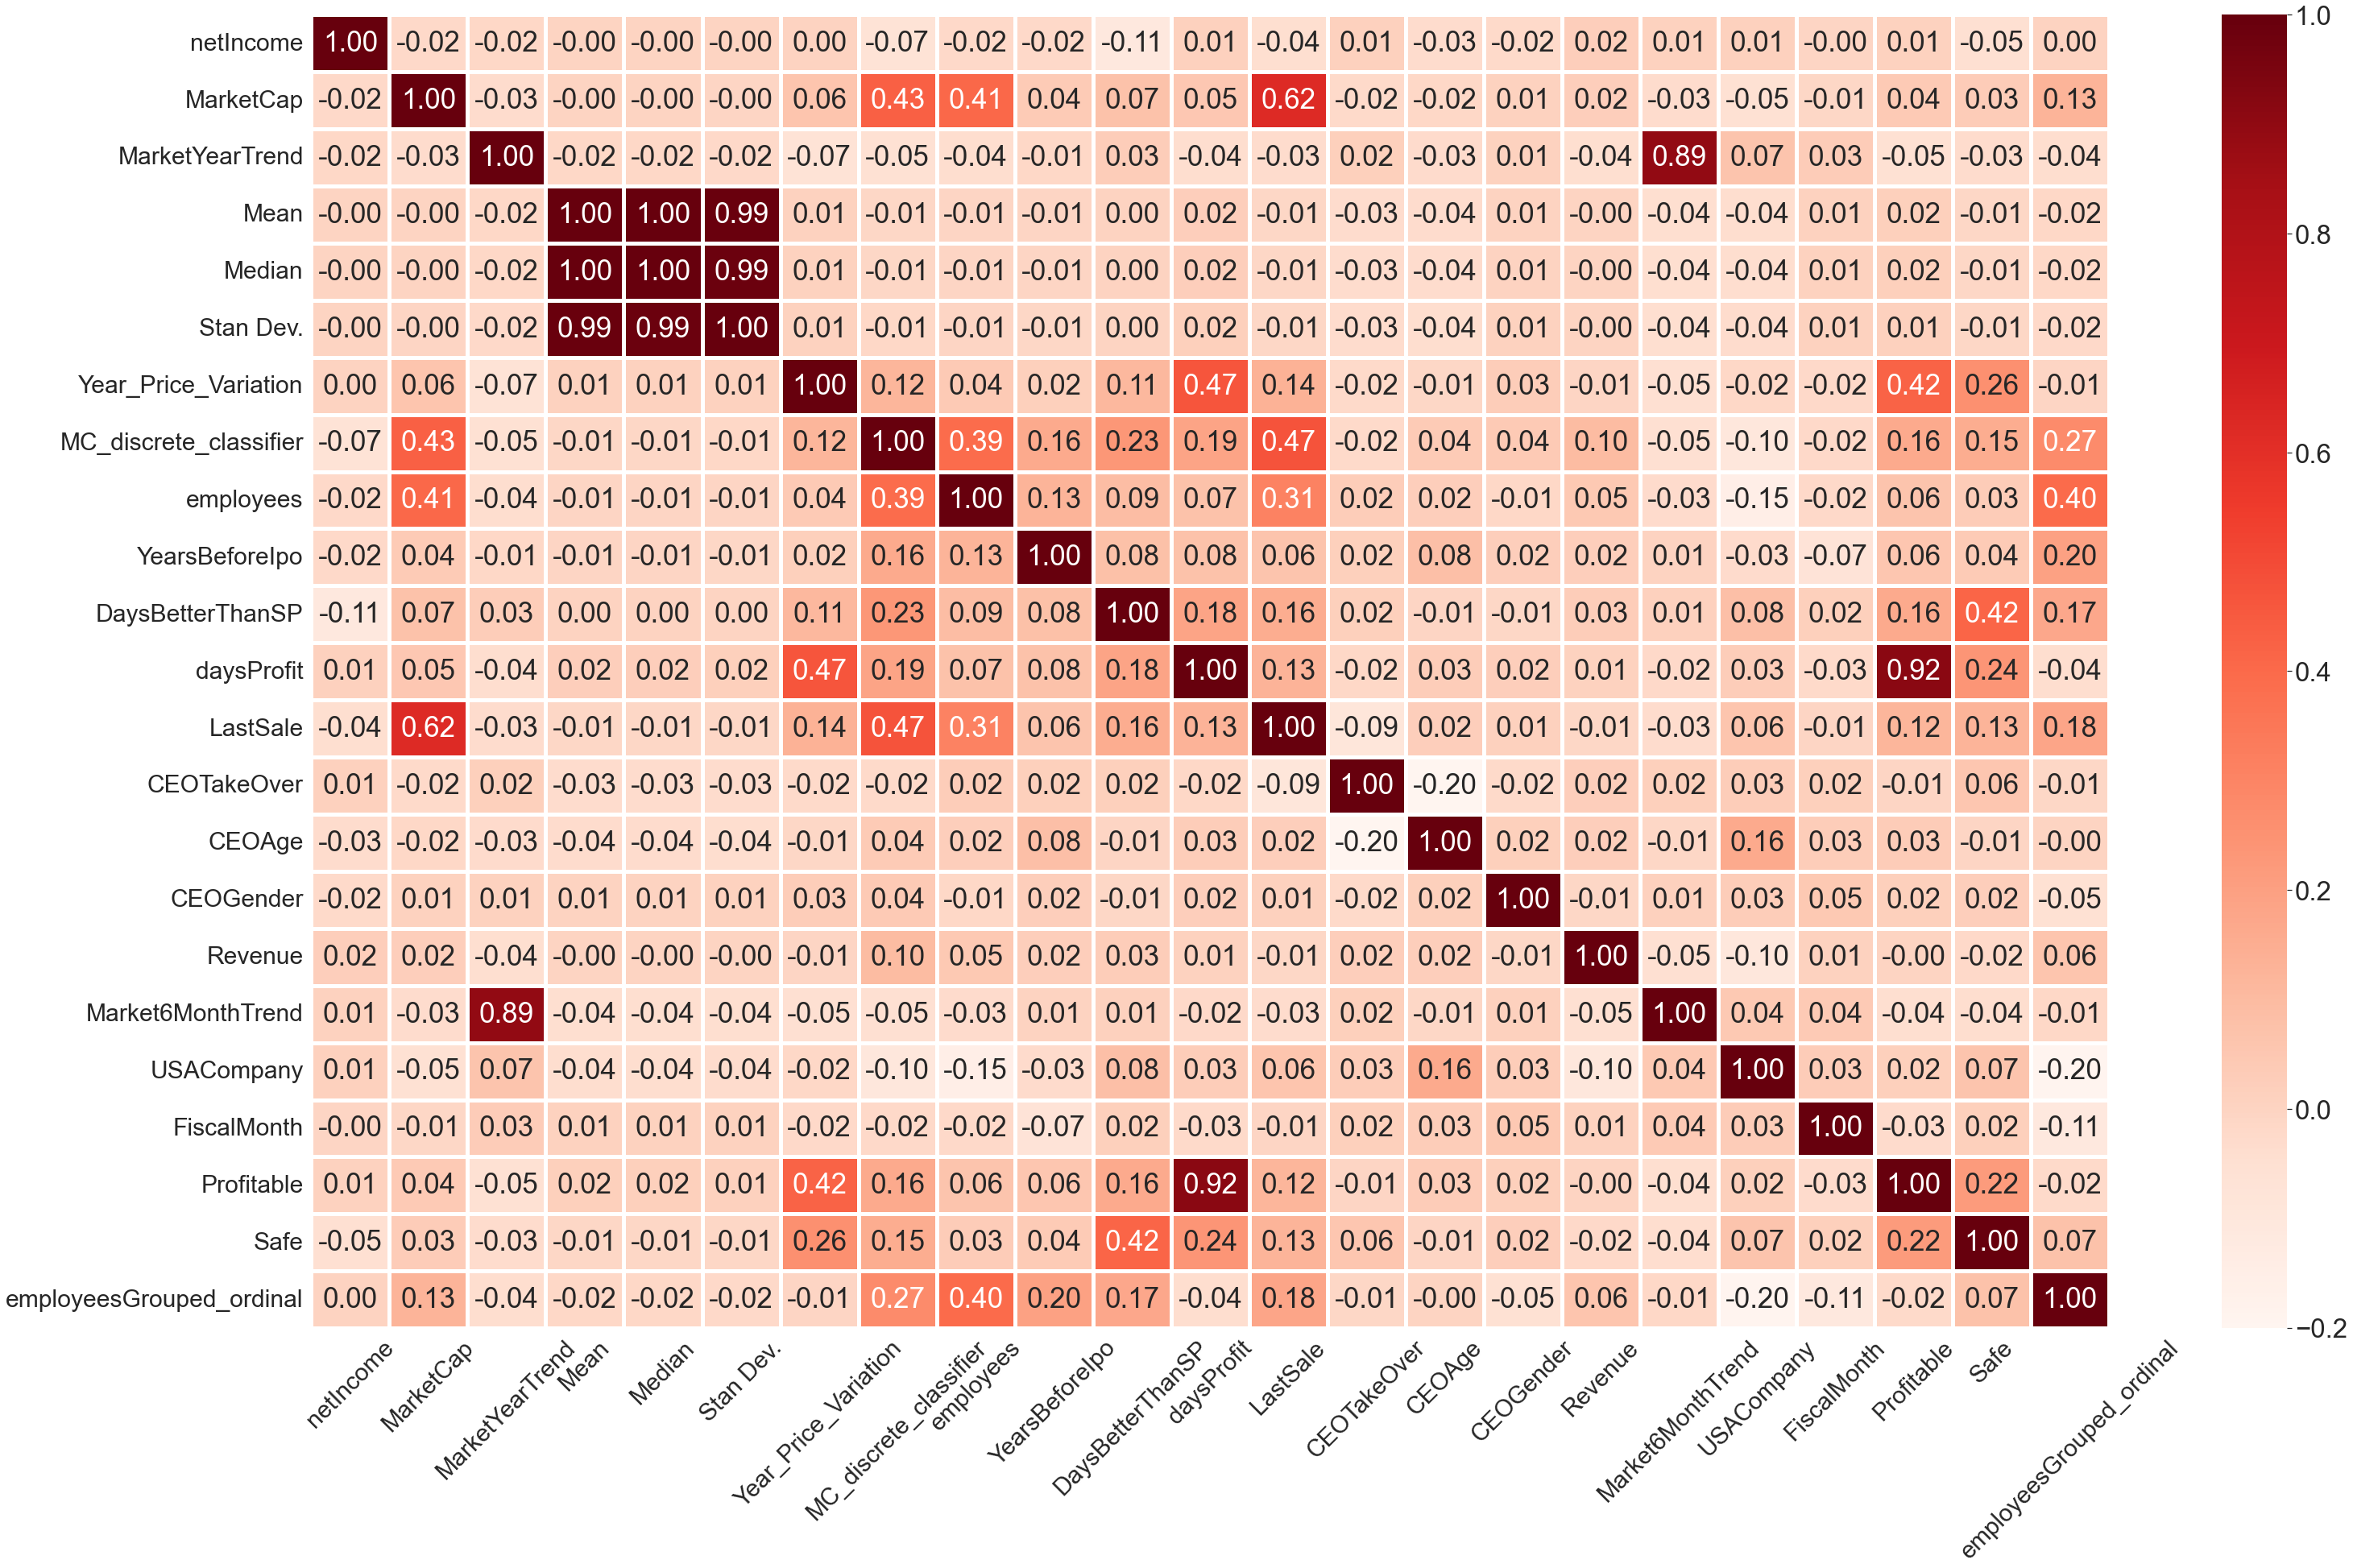

In [320]:
fig, ax = plt.subplots(figsize=(50,30))
cor = df_main_clean3.corr()

sns.set(font_scale=3)
g = sns.heatmap(cor,annot=True, annot_kws={'fontsize':35}, linewidths= 5, fmt=".2f", cmap = 'Reds')
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 30, rotation = 45)


plt.show()

### Existen dos variables que se correlacionan muy fuertemente y que deben ser explicadas a detalle, puesto que, con la información disponible en la fuente de origen del dataset, no basta para entender su comportamiento. Estas son: 'daysProfit' y 'Profitable'.

In [321]:
df_main_clean3[['Symbol', 'daysProfit', 'Profitable', 'Year_Price_Variation']]

Symbol  daysProfit  Profitable  Year_Price_Variation
0         A         249           1              0.114706
1       AAC         262           1              0.320541
2      AAOI         262           1              0.687751
3       AAP         261           1              0.236187
4       AAT         127           0             -0.026353
...     ...         ...         ...                   ...
3743   ZUMZ         261           1              1.800161
3744    ZUO           7           0             -0.014000
3745     ZX          25           0             -0.408547
3746   ZYME          19           0             -0.078462
3747   ZYNE          42           0             -0.353846

[3748 rows x 4 columns]

In [322]:
df_prices[df_prices['Symbol']=='ZUO']

Symbol  closeDay0  highDay0  openDay0  lowDay0  volumeDay0  closeDay1  \
3758    ZUO       20.0     21.85     19.12     20.0  13102419.0       20.6   

      highDay1  openDay1  lowDay1  volumeDay1  closeDay2  highDay2  openDay2  \
3758     20.82      19.6     19.8   1864667.0       20.6     20.88      19.9   

      lowDay2  volumeDay2  closeDay3  highDay3  openDay3  lowDay3  volumeDay3  \
3758    20.88    907867.0      19.55     20.66      19.0    20.55   1152504.0   

      closeDay4  highDay4  openDay4  lowDay4  volumeDay4  closeDay5  highDay5  \
3758      19.56     20.42   19.0742    19.61    886009.0      19.65     19.72   

      openDay5  lowDay5  volumeDay5  closeDay6  highDay6  openDay6  lowDay6  \
3758    19.211    19.57    463459.0      19.72     19.73     19.45    19.55   

      volumeDay6  closeDay7  highDay7  openDay7  lowDay7  volumeDay7  \
3758    300461.0        NaN       NaN       NaN      NaN         NaN   

      closeDay8  highDay8  openDay8  lowDay8  volumeDay8  closeDay9  highDay9  \
3758        NaN       NaN       NaN      NaN         NaN        NaN       NaN   

      openDay9  lowDay9  volumeDay9  closeDay10  highDay10  openDay10  \
3758       NaN      NaN         NaN         NaN        NaN        NaN   

      lowDay10  volumeDay10  closeDay11  highDay11  openDay11  lowDay11  \
3758       NaN          NaN         NaN        NaN        NaN       NaN   

      volumeDay11  closeDay12  highDay12  openDay12  lowDay12  volumeDay12  \
3758          NaN         NaN        NaN        NaN       NaN          NaN   

      closeDay13  highDay13  openDay13  lowDay13  volumeDay13  closeDay14  \
3758         NaN        NaN        NaN       NaN          NaN         NaN   

      highDay14  openDay14  lowDay14  volumeDay14  closeDay15  highDay15  \
3758        NaN        NaN       NaN          NaN         NaN        NaN   

      openDay15  lowDay15  volumeDay15  closeDay16  highDay16  openDay16  \
3758        NaN       NaN          NaN         NaN        NaN        NaN   

      lowDay16  volumeDay16  closeDay17  highDay17  openDay17  lowDay17  \
3758       NaN          NaN         NaN        NaN        NaN       NaN   

      volumeDay17  closeDay18  highDay18  openDay18  lowDay18  volumeDay18  \
3758          NaN         NaN        NaN        NaN       NaN          NaN   

      closeDay19  highDay19  openDay19  lowDay19  volumeDay19  closeDay20  \
3758         NaN        NaN        NaN       NaN          NaN         NaN   

      highDay20  openDay20  lowDay20  volumeDay20  closeDay21  highDay21  \
3758        NaN        NaN       NaN          NaN         NaN        NaN   

      openDay21  lowDay21  volumeDay21  closeDay22  highDay22  openDay22  \
3758        NaN       NaN          NaN         NaN        NaN        NaN   

      lowDay22  volumeDay22  closeDay23  highDay23  openDay23  lowDay23  \
3758       NaN          NaN         NaN        NaN        NaN       NaN   

      volumeDay23  closeDay24  highDay24  openDay24  lowDay24  volumeDay24  \
3758          NaN         NaN        NaN        NaN       NaN          NaN   

      closeDay25  highDay25  openDay25  lowDay25  volumeDay25  closeDay26  \
3758         NaN        NaN        NaN       NaN          NaN         NaN   

      highDay26  openDay26  lowDay26  volumeDay26  closeDay27  highDay27  \
3758        NaN        NaN       NaN          NaN         NaN        NaN   

      openDay27  lowDay27  volumeDay27  closeDay28  highDay28  openDay28  \
3758        NaN       NaN          NaN         NaN        NaN        NaN   

      lowDay28  volumeDay28  closeDay29  highDay29  openDay29  lowDay29  \
3758       NaN          NaN         NaN        NaN        NaN       NaN   

      volumeDay29  closeDay30  highDay30  openDay30  lowDay30  volumeDay30  \
3758          NaN         NaN        NaN        NaN       NaN          NaN   

      closeDay31  highDay31  openDay31  lowDay31  volumeDay31  closeDay32  \
3758         NaN        NaN        NaN       NaN       

In [323]:
# Debemos estudiar a que se refieren las variables daysProfit y Profitable para poder descargar alguna, puesto que la 
# documentacion no es clara para ninguna de las dos.

df = df_closeDay_prices_clean[df_closeDay_prices_clean['Symbol'] == 'ZUO'].T
df.columns = df.iloc[0] 
df = df.drop(df.index[[0, -1, -2, -3, -4]], axis=0)
df

Symbol         ZUO
closeDay0     20.0
closeDay1     20.6
closeDay2     20.6
closeDay3    19.55
closeDay4    19.56
...            ...
closeDay257  19.72
closeDay258  19.72
closeDay259  19.72
closeDay260  19.72
closeDay261  19.72

[262 rows x 1 columns]

In [324]:
var_diaria = [0]
for i in range(0, len(df.ZUO)):
    if i > 0:
        var = round(df.ZUO[i] - df.ZUO[i-1], 2)
        var_diaria.append(var)

In [325]:
df['var_diaria'] = var_diaria

In [326]:
mayor_inicio = []
for i in range(0, len(df.ZUO)):
    mayor = round(df.ZUO[i] - df.ZUO[0], 2)
    mayor_inicio.append(mayor)

In [327]:
df['mayor_inicio'] = mayor_inicio

In [328]:
df

Symbol         ZUO  var_diaria  mayor_inicio
closeDay0     20.0        0.00          0.00
closeDay1     20.6        0.60          0.60
closeDay2     20.6        0.00          0.60
closeDay3    19.55       -1.05         -0.45
closeDay4    19.56        0.01         -0.44
...            ...         ...           ...
closeDay257  19.72        0.00         -0.28
closeDay258  19.72        0.00         -0.28
closeDay259  19.72        0.00         -0.28
closeDay260  19.72        0.00         -0.28
closeDay261  19.72        0.00         -0.28

[262 rows x 3 columns]

##### 'Profitable' 
hace referencia a las acciones que terminaron el año en positivo. Para esto considera que la acción cotizó todo el año y por ende no desapareció en el camino (normalmente las que van mal son las que salen del mercado).
##### 'daysProfit' 
se refiere a que el precio de cierre (close) es mayor al precio de apertura de la mañana (open). Según la data de este DF, durante la noche, mientras la bolsa no opera, las acciones pueden caer (o subir) frente al precio de cierre. Esto puede ocasionar que se tengan muchos 'daysProfit' pero que la acción no gane valor o incluso esté más abajo que su punto inicial.

#### Las variables a descartar luego del análisis son:
1. Market6MonthTrend: MarketYearTrend es su competidora directa y es una variable más completa ya que se prefiere un mayor tiempo de evaluación de la tendencia de mercado para mayor precisión.
2. Profitable y daysProfit: ambas variables competidoras directas serán descartas ya que, ambas miden lo mismo que la variable objetivo y una vez que se tiene el dato favorable, ya la oportunidad de compra de la acción pasó. 
3. Stan Dev.: presenta una muy alta correlación con 'Median' que es más importante en caso se desee analizar la fluctuación del precio anual de una determinada acción.
4. Mean: presenta una muy alta correlación con 'Median' que es más importante en caso se desee analizar la fluctuación del precio anual de una determinada acción. Es menos relevante saber a cuanto cotizó de media (donde unos picos breves pueden distorsionarte el rendimiento, que no es raro en mercados ilíquidos ya que son más volátiles) que saber cuanto valió como mínimo el 50% de los días que cotizó.

BONUS: 'MarketCapClassifier' es reemplazada por MC_discrete_classifier así que no tiene sentido seguir teniéndola en cuenta.

In [329]:
df_main_clean4 = df_main_clean3
df_main_clean4 = df_main_clean4.drop(['Market6MonthTrend', 'Profitable', 'daysProfit', 'Stan Dev.', 'Mean', 'MarketCapClassifier'], axis = 1)

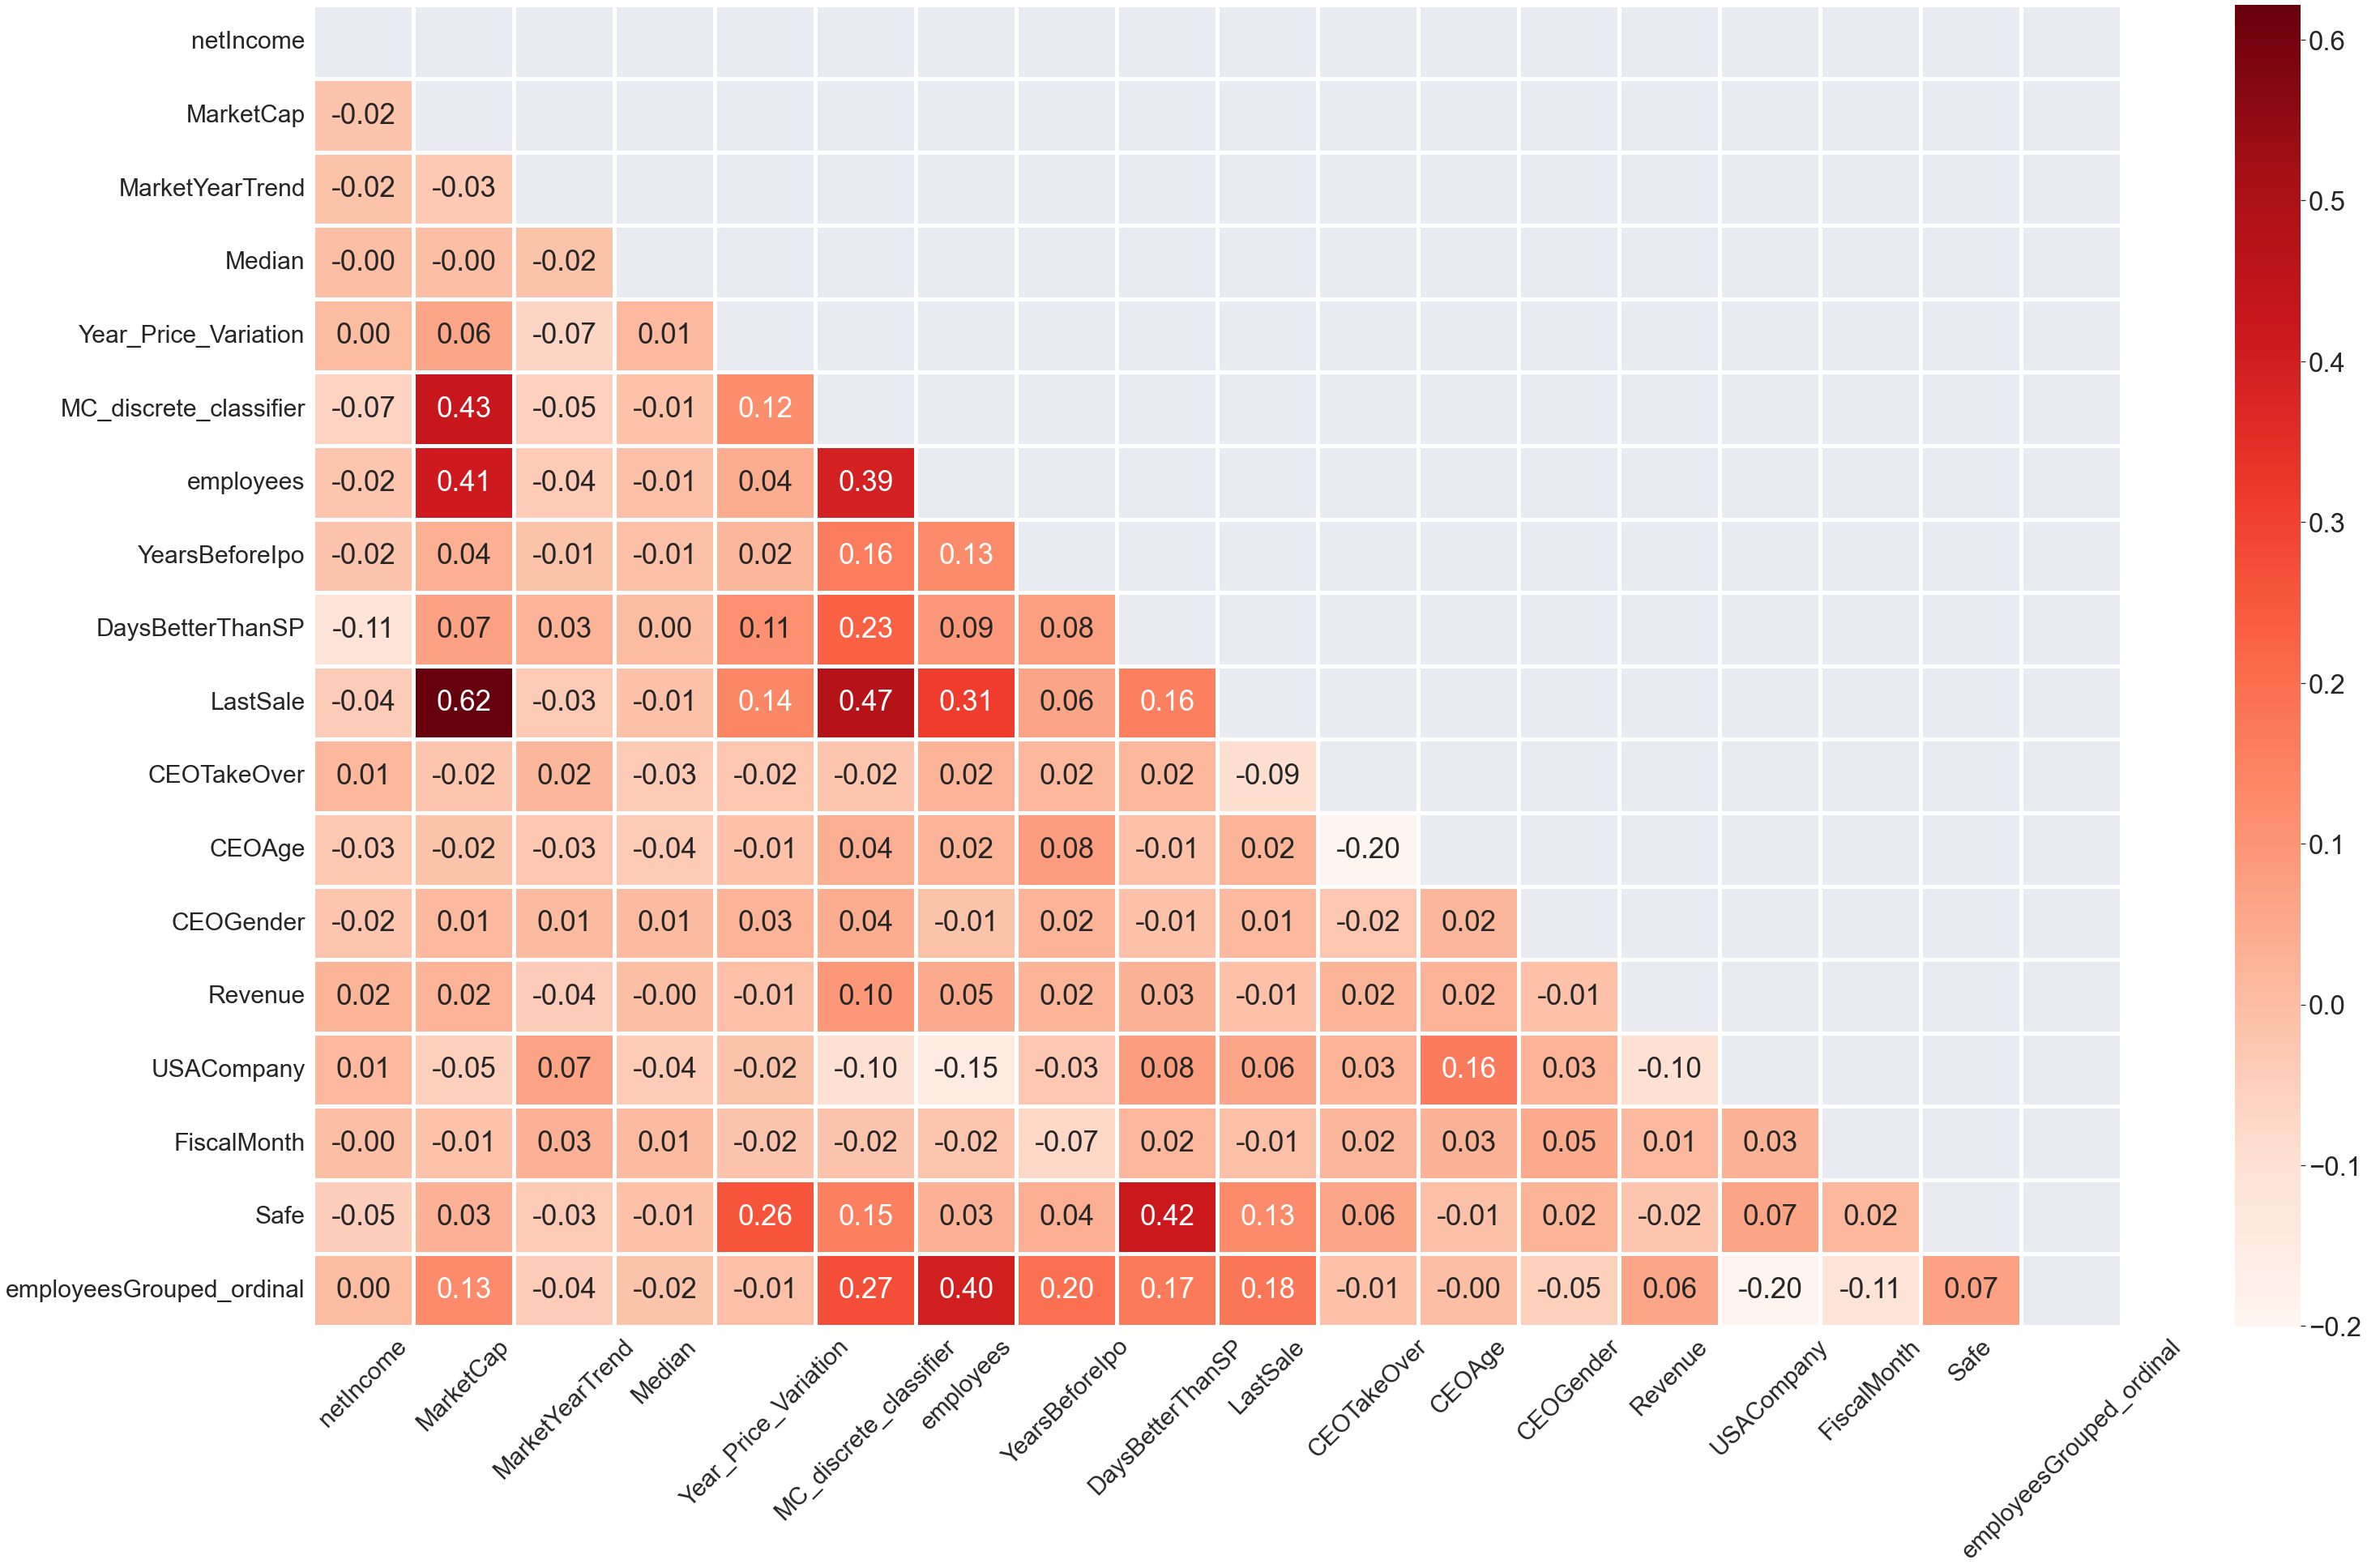

In [330]:
fig, ax = plt.subplots(figsize=(50,30))

cor = df_main_clean4.corr()
mask = np.triu(np.ones_like(cor, dtype='bool'))

sns.set(font_scale=3)
g = sns.heatmap(cor,annot=True, annot_kws={'fontsize':35}, linewidths= 5, fmt=".2f", cmap = 'Reds', mask=mask)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 30, rotation = 45)

plt.show()

In [331]:
# Variables a utilizar:

df_main_clean4.columns

Index(['Symbol', 'Sector', 'netIncome', 'MarketCap', 'MarketYearTrend',
       'Median', 'Year_Price_Variation', 'MC_discrete_classifier', 'employees',
       'employeesGrouped', 'YearsBeforeIpo', 'DaysBetterThanSP', 'LastSale',
       'Industry', 'CEOTakeOver', 'CEOAge', 'CEOGender', 'City',
       'stateCountry', 'Revenue', 'USACompany', 'FiscalMonth', 'Safe',
       'employeesGrouped_ordinal'],
      dtype='object')

#### 7.2. El método de aprendizaje supervisado seleccionado es la regresión debido a que lo que se pretende es maximizar la inversión en compañías que recién salen a cotizar a bolsa luego de una IPO. En este sentido, se trata de predecir un resultado continuo como lo es el rendimiento en el primer año de cotización ('Year_Price_Variation').

#### A continuación, usaremos solo las variables continuas para realizar unas primeras predicciones con el 'df_main_clean4_numeric' derivado del 'df_main_clean4'.

In [332]:
df_main_clean4.columns

Index(['Symbol', 'Sector', 'netIncome', 'MarketCap', 'MarketYearTrend',
       'Median', 'Year_Price_Variation', 'MC_discrete_classifier', 'employees',
       'employeesGrouped', 'YearsBeforeIpo', 'DaysBetterThanSP', 'LastSale',
       'Industry', 'CEOTakeOver', 'CEOAge', 'CEOGender', 'City',
       'stateCountry', 'Revenue', 'USACompany', 'FiscalMonth', 'Safe',
       'employeesGrouped_ordinal'],
      dtype='object')

In [333]:
df_main_clean4_numeric = df_main_clean4[['netIncome', 'MarketCap', 'MarketYearTrend',
       'Median', 'MC_discrete_classifier',
       'YearsBeforeIpo',
       'DaysBetterThanSP', 'LastSale',
       'Revenue', 'USACompany',
       'Safe', 'employeesGrouped_ordinal', 'Year_Price_Variation']]

In [334]:
df_main_clean4_numeric['netIncome'] = df_main_clean4_numeric['netIncome'].fillna(0)
df_main_clean4_numeric['Revenue'] = df_main_clean4_numeric['Revenue'].fillna(0)
df_main_clean4_numeric['LastSale'] = df_main_clean4_numeric['LastSale'].fillna(0)

In [335]:
df_main_clean4_numeric=df_main_clean4_numeric.dropna(axis=0)

In [336]:
for i in df_main_clean4_numeric.columns:
    print(f'{i}: {df_main_clean4_numeric[i].isna().sum()}')

netIncome: 0
MarketCap: 0
MarketYearTrend: 0
Median: 0
MC_discrete_classifier: 0
YearsBeforeIpo: 0
DaysBetterThanSP: 0
LastSale: 0
Revenue: 0
USACompany: 0
Safe: 0
employeesGrouped_ordinal: 0
Year_Price_Variation: 0


In [337]:
df_main_clean4_numeric.shape

(2831, 13)

In [338]:
df_main_clean4_numeric.columns

Index(['netIncome', 'MarketCap', 'MarketYearTrend', 'Median',
       'MC_discrete_classifier', 'YearsBeforeIpo', 'DaysBetterThanSP',
       'LastSale', 'Revenue', 'USACompany', 'Safe', 'employeesGrouped_ordinal',
       'Year_Price_Variation'],
      dtype='object')

In [339]:
df_main_clean4_numeric

X = df_main_clean4_numeric[['netIncome', 'MarketCap', 'MarketYearTrend', 'Median',
       'MC_discrete_classifier', 'YearsBeforeIpo', 'DaysBetterThanSP',
       'LastSale', 'Revenue', 'USACompany', 'Safe',
       'employeesGrouped_ordinal']].values

y = df_main_clean4_numeric['Year_Price_Variation']

# --------------------------------------------------------------------

#### 7.3. El método para evaluar la precisión del modelo será el R-Cuadrado ajustado y adicionalmente el RMSE - Root Mean Squared Error (Raíz del Error Cuadrático Medio). Dado que este no penaliza excesivamente los valores muy apartados de la prediccion del modelo.

#### 7.4. Expectativas del modelo:
- Poder predecir que tan rentable es participar en una IPO con al menos 2/3 (66.6%) de confianza en el modelo (en base al R2 Ajustado).
- El RMSE del training y test set deben ser similares (prevenir over y underfitting).
- Capacidad de condicionar al modelo en base a un sector o industria específico y tener un resultado igual de bueno al 66.6%.
- Un paso más avanzado sería armar un modelo que permita agrupar IPO's y brindar una predicción sobre un rango de rentabilidades. Por ejemplo, solicitarle al modelo armar un portafolio de 10 acciones que, como mínimo, cumpla con dos requisitos (al menos 8% de rentabilidad y 90% de probabilidad de conseguirlo).


# 8. Incorporar variasbles dummy

In [340]:
df_main_clean4

Symbol              Sector    netIncome     MarketCap  MarketYearTrend  \
0         A       Capital Goods  684000000.0  2.198323e+10           0.0204   
1       AAC         Health Care  -20580000.0  2.707691e+08           0.0088   
2      AAOI          Technology   73950000.0  5.844368e+08           0.0144   
3       AAP   Consumer Services  475510000.0  7.874971e+09          -0.0075   
4       AAT   Consumer Services   29080000.0  1.604956e+09           0.0226   
...     ...                 ...          ...           ...              ...   
3743   ZUMZ   Consumer Services   26800000.0  6.085133e+08           0.0055   
3744    ZUO  No Specific Sector  -47160000.0  2.132269e+09           0.0079   
3745     ZX       Capital Goods    1340000.0  6.711250e+07           0.0149   
3746   ZYME         Health Care  -10410000.0  3.068106e+08           0.0174   
3747   ZYNE         Health Care  -32010000.0  1.358850e+08           0.0084   

       Median  Year_Price_Variation  MC_discrete_classifier  employees  \
0     44.8908              0.114706                       4    13500.0   
1     29.5400              0.320541                       1     2100.0   
2     18.4200              0.687751                       1     3054.0   
3     16.7000              0.236187                       3    71000.0   
4     21.1500             -0.026353                       2      194.0   
...       ...                   ...                     ...        ...   
3743  17.8850              1.800161                       1     8900.0   
3744  19.7200             -0.014000                       2      933.0   
3745   4.2800             -0.408547                       1        NaN   
3746   8.8000             -0.078462                       1      147.0   
3747   9.6700             -0.353846                       1       22.0   

      employeesGrouped  YearsBeforeIpo  DaysBetterThanSP  LastSale  \
0     10000 - 566000.0             0.0               122     68.17   
1          1001 - 5000             0.0               131     11.07   
2          1001 - 5000            16.0               125     29.97   
3     10000 - 566000.0            72.0               128    106.45   
4            101 - 500             1.0               123     34.00   
...                ...             ...               ...       ...   
3743      5001 - 10000            27.0               139     24.10   
3744        501 - 1000            11.0                 5     20.60   
3745  10000 - 566000.0             3.0               102      1.30   
3746         101 - 500            14.0               115     12.05   
3747           0 - 100             8.0               104     10.02   

                                              Industry  CEOTakeOver  CEOAge  \
0     Biotechnology: Laboratory Analytical Instruments       2015.0    56.0   
1                                 Medical Specialities       2013.0    46.0   
2                                       Semiconductors       2014.0    54.0   
3                               Other Specialty Stores       2016.0    59.0   
4                        Real Estate Investment Trusts       2015.0    79.0   
...                                                ...          ...     ...   
3743                    Clothing/Shoe/Accessory Stores       2011.0    57.0   
3744                                               NaN       2017.0     NaN   
3745                                 Auto Parts:O.E.M.          NaN    47.0   
3746                             Major Pharmaceuticals          NaN     NaN   
3747                             Major Pharmaceuticals       2014.0    59.0   

      CEOGender           City stateCountry      Revenue  USACompany  \
0           4.0    Santa Clara           CA    4470000.0         1.0   
1           4.0      Brentwood           TN  317640000.0         1.0   
2           NaN     Sugar Land           TX  382330000.0         1.0   
3           4.0        Roanoke           VA    9370000.0         1.0   
4           4.0  

In [341]:
df_Sector = pd.get_dummies(df_main_clean4['Sector'])
df_Industry = pd.get_dummies(df_main_clean4['Industry'])
df_stateCountry = pd.get_dummies(df_main_clean4['stateCountry'])

In [342]:
df1 = df_main_clean4
df2 = pd.concat([df1, df_Sector, df_Industry, df_stateCountry], axis=1).reindex(df2.index)
df2.drop(['Sector', 'Industry', 'stateCountry'], axis=1, inplace=True)

In [343]:
df2.columns

Index(['Symbol', 'netIncome', 'MarketCap', 'MarketYearTrend', 'Median',
       'Year_Price_Variation', 'MC_discrete_classifier', 'employees',
       'employeesGrouped', 'YearsBeforeIpo',
       ...
       ' VA', ' VT', ' WA', ' WI', ' WV', ' WY', ' the Bahamas',
       ' the Netherlands', ' the United Arab Emirates', ' the United Kingdom'],
      dtype='object', length=263)

In [344]:
for i in df2.columns:
    print(f'{i}: {df2[i].isna().sum()}')

Symbol: 14
netIncome: 893
MarketCap: 14
MarketYearTrend: 14
Median: 14
Year_Price_Variation: 14
MC_discrete_classifier: 14
employees: 1183
employeesGrouped: 14
YearsBeforeIpo: 765
DaysBetterThanSP: 14
LastSale: 15
CEOTakeOver: 1035
CEOAge: 766
CEOGender: 843
City: 888
Revenue: 1168
USACompany: 889
FiscalMonth: 906
Safe: 14
employeesGrouped_ordinal: 14
Basic Industries: 14
Capital Goods: 14
Consumer Durables: 14
Consumer Non-Durables: 14
Consumer Services: 14
Energy: 14
Finance: 14
Health Care: 14
Miscellaneous: Miscellaneous    14
Miscellaneous    14
dtype: int64
No Specific Sector: 14
Public Utilities: 14
Technology: 14
Transportation: 14
Accident &Health Insurance: 14
Advertising: 14
Aerospace: 14
Agricultural Chemicals: 14
Air Freight/Delivery Services: 14
Aluminum: 14
Apparel: 14
Auto Manufacturing: 14
Auto Parts:O.E.M.: 14
Automotive Aftermarket: 14
Banks: 14
Beverages (Production/Distribution): 14
Biotechnology: Biological Products (No Diagnostic Substances): 14
Biotechnology: Co

# 9. Primeras Pruebas

In [345]:
df2['netIncome'] = df2['netIncome'].fillna(0)
df2['Revenue'] = df2['Revenue'].fillna(0)
df2['LastSale'] = df2['LastSale'].fillna(0)

In [346]:
df2 = df2.dropna(axis=0)

In [367]:
df3 = df2.drop(['Symbol','Year_Price_Variation', 'CEOTakeOver', 'CEOGender', 'CEOAge', 'employeesGrouped', 'City'], axis=1)

In [368]:
for i in df3.columns:
    print(f'{i}: {df3[i].isna().sum()}')

netIncome: 0
MarketCap: 0
MarketYearTrend: 0
Median: 0
MC_discrete_classifier: 0
employees: 0
YearsBeforeIpo: 0
DaysBetterThanSP: 0
LastSale: 0
Revenue: 0
USACompany: 0
FiscalMonth: 0
Safe: 0
employeesGrouped_ordinal: 0
Basic Industries: 0
Capital Goods: 0
Consumer Durables: 0
Consumer Non-Durables: 0
Consumer Services: 0
Energy: 0
Finance: 0
Health Care: 0
Miscellaneous: Miscellaneous    0
Miscellaneous    0
dtype: int64
No Specific Sector: 0
Public Utilities: 0
Technology: 0
Transportation: 0
Accident &Health Insurance: 0
Advertising: 0
Aerospace: 0
Agricultural Chemicals: 0
Air Freight/Delivery Services: 0
Aluminum: 0
Apparel: 0
Auto Manufacturing: 0
Auto Parts:O.E.M.: 0
Automotive Aftermarket: 0
Banks: 0
Beverages (Production/Distribution): 0
Biotechnology: Biological Products (No Diagnostic Substances): 0
Biotechnology: Commercial Physical & Biological Resarch: 0
Biotechnology: Electromedical & Electrotherapeutic Apparatus: 0
Biotechnology: In Vitro & In Vivo Diagnostic Substances

In [369]:
for i in df3.columns:
    print(f'{i}: {df3[i].isna().sum()}')

netIncome: 0
MarketCap: 0
MarketYearTrend: 0
Median: 0
MC_discrete_classifier: 0
employees: 0
YearsBeforeIpo: 0
DaysBetterThanSP: 0
LastSale: 0
Revenue: 0
USACompany: 0
FiscalMonth: 0
Safe: 0
employeesGrouped_ordinal: 0
Basic Industries: 0
Capital Goods: 0
Consumer Durables: 0
Consumer Non-Durables: 0
Consumer Services: 0
Energy: 0
Finance: 0
Health Care: 0
Miscellaneous: Miscellaneous    0
Miscellaneous    0
dtype: int64
No Specific Sector: 0
Public Utilities: 0
Technology: 0
Transportation: 0
Accident &Health Insurance: 0
Advertising: 0
Aerospace: 0
Agricultural Chemicals: 0
Air Freight/Delivery Services: 0
Aluminum: 0
Apparel: 0
Auto Manufacturing: 0
Auto Parts:O.E.M.: 0
Automotive Aftermarket: 0
Banks: 0
Beverages (Production/Distribution): 0
Biotechnology: Biological Products (No Diagnostic Substances): 0
Biotechnology: Commercial Physical & Biological Resarch: 0
Biotechnology: Electromedical & Electrotherapeutic Apparatus: 0
Biotechnology: In Vitro & In Vivo Diagnostic Substances

In [370]:
X = df3[df3.columns].values

y = df2['Year_Price_Variation']

## 9.1. Ridge Regression

In [371]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [372]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=0.5))

#### Training Ridge Regression on Training set

In [373]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

In [374]:
ridge = Ridge(alpha=0.5)

In [375]:
model.fit(train_X, train_y)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge(alpha=0.5))])

In [376]:
y_pred = model.predict(test_X)

In [377]:
from sklearn.metrics import mean_squared_error

In [378]:
mean_squared_error(test_y, y_pred)

0.6362134491368096

In [379]:
np.sqrt(mean_squared_error(test_y, y_pred))

0.7976298948364521

In [380]:
print("R-squared: %.2f" % model.score(test_X, test_y))

R-squared: 0.09


## 8.2. RidgeCV

In [381]:
from sklearn.linear_model import RidgeCV

In [382]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [383]:
alphas = [1e-3, 1e-1, 1, 1e3, 1e6] #Cuanto ajuste queremos que haya (a menor alpha, mayor overfitting)

regressor = RidgeCV(alphas=1e-3, store_cv_values=True)

regressor.fit(train_X, train_y)

RidgeCV(alphas=array(0.001), store_cv_values=True)

In [384]:
y_pred = regressor.predict(test_X)

In [385]:
mean_squared_error(test_y, y_pred)

9.492439452929927e+18

In [386]:
np.sqrt(mean_squared_error(test_y, y_pred))

3080980274.6739435

In [387]:
print("R-squared: %.2f" % regressor.score(test_X, test_y))

R-squared: -11791606743864360960.00


In [388]:
cv_mse = np.mean(regressor.cv_values_, axis=0)

print(alphas)
print(cv_mse)

[0.001, 0.1, 1, 1000.0, 1000000.0]
[0.61619341]


## 8.3. Random Forest

In [389]:
from sklearn.ensemble import RandomForestRegressor

In [390]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(train_X, train_y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [391]:
regressor.predict(test_X)

array([-6.78878803e-02,  5.93998982e-01, -3.27322137e-01,  4.16854672e-02,
       -2.97396681e-01, -2.60054633e-01,  7.80845726e-01,  9.41955193e-02,
       -2.72768049e-01,  7.21696067e-01,  5.96322536e-02,  1.58182834e-01,
        4.01685323e-01, -2.01598396e-01,  7.65621715e-02, -3.38983689e-01,
        4.40889817e-01,  1.18484425e+00,  7.41569125e-01,  3.37545592e-02,
       -1.55830943e-01, -2.12822549e-01,  9.41955193e-02,  1.11632794e-01,
       -1.09788420e-01,  9.41955193e-02,  9.15437197e-03, -3.09742562e-01,
       -3.91269713e-02,  9.41955193e-02,  2.29611415e+00, -1.05865552e-01,
        2.65405176e-01,  2.72089116e-01,  4.27768261e-01, -1.36446367e-01,
        7.84569733e-01,  4.99730643e-01, -4.75460316e-01, -7.04978561e-02,
        1.16190423e+00, -1.89993990e-01,  1.97306346e-01,  3.44273998e-01,
        4.91007356e-01, -1.41433881e-02, -1.65672488e-01,  2.18117266e-01,
       -4.13584815e-02, -6.94767617e-02,  7.13739195e-01,  1.03267380e+00,
        3.34693089e-02, -

##### Realizamos k-Fold Cross Validation

In [392]:
from sklearn.model_selection import cross_val_score

In [393]:
accuracies = cross_val_score(estimator=regressor, X=train_X, y=train_y, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -4.17 %
Standard Deviation: 19.96 %


## 8.4. XGBoost

In [394]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

#### Training XGBoost on Training set

In [395]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

##### Realizamos k-Fold Cross Validation

In [396]:
accuracies = cross_val_score(estimator=regressor, X=train_X, y=train_y, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -16.38 %
Standard Deviation: 29.37 %


#### De las pruebas podemos ver que ninguno de los cuatro modelos hace una buena predicción del movimiento del precio anual de la acción. Puede deberse a diversos motivos tales como: pobre manipulación de la data (diferentes escalas para las variables predictoras), mala implementación de los modelos, dataset defectuoso o debido a que solo se incluyeron las variables numéricas (o categóricas que podían ser convertidas a numéricas) y se dejaron de lado variables como 'Sector' o 'industry'.